## Data Preprocessing

In [1]:
import pandas as pd 
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data=pd.read_csv('data/DataScientist_01_Assessment.csv')
data.head()

District    Cluster    Village        HouseHoldID  HouseholdSize  TimeToOPD  \
0  Kanungu  Rutendere   Kangyeyo  KAN-KAN-FER-K1768              3         60   
1  Kanungu    Kihanda  Omurwambu  KAN-OMU-KAN-K4711              3        120   
2  Kanungu   Bujengwe     Byumba  KAN-BYU-ANN-K4055              2         40   
3  Kanungu   Bujengwe     Byumba  KAN-BYU-YUS-K4026              8         15   
4  Kanungu   Bujengwe     Kazahi  KAN-KAZ-FAU-K2057              5        120   

   TimeToWater  AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0         35.0             0.25                    0                    6   
1         10.0             1.00                    2                    3   
2         10.0              NaN                    3                    3   
3         40.0             1.00                    2                    4   
4         51.0             1.00                    2                    2   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                    1             0        0.000000                0.000000   
1                    3             0        0.000000                0.000000   
2                    2             0        0.000000                0.000000   
3                    4         20000        4.481111                0.000000   
4                    1             0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Handle missing values using SimpleImputer for numerical and categorical columns
train_data=data.drop(['HouseHoldID'],axis=1)
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Imputer for numerical features (using median)
num_imputer = SimpleImputer(strategy='median')

# Imputer for categorical features (using most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')

train_data[numerical_cols] = num_imputer.fit_transform(train_data[numerical_cols])
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])

In [3]:
train_data.head()

District    Cluster    Village  HouseholdSize  TimeToOPD  TimeToWater  \
0  Kanungu  Rutendere   Kangyeyo            3.0       60.0         35.0   
1  Kanungu    Kihanda  Omurwambu            3.0      120.0         10.0   
2  Kanungu   Bujengwe     Byumba            2.0       40.0         10.0   
3  Kanungu   Bujengwe     Byumba            8.0       15.0         40.0   
4  Kanungu   Bujengwe     Kazahi            5.0      120.0         51.0   

   AgricultureLand  Season1CropsPlanted  Season2CropsPlanted  \
0             0.25                  0.0                  6.0   
1             1.00                  2.0                  3.0   
2             1.00                  3.0                  3.0   
3             1.00                  2.0                  4.0   
4             1.00                  2.0                  2.0   

   PerennialCropsGrown  VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0                  1.0           0.0        0.000000                0.000000   
1                  3.0           0.0        0.000000                0.000000   
2                  2.0           0.0        0.000000                0.000000   
3                  4.0       20000.0        4.481111                0.000000   
4                  1.0           0.0        0.000000               22.405556   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0         0.000000               3.920972   
1                     0.0         0.000000               0.000000   
2                     0.0         0.000000               0.672167   
3                     0.0         0.000000               6.945722   
4                     0.0        22.405556              38.089444   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0               5.601389                9.522361               0.0   
1               1.344333                1.344333               0.0   
2               1.792444                2.464611               0.0   
3               0.000000                6.945722               0.0   
4               0.000000               38.089444               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                           0.000000     44.811111            33.608333   
1                           0.000000      0.000000             6.721667   
2                           0.000000     91.414667            26.886667   
3                           4.481111      0.000000             0.000000   
4                           0.000000      0.000000           123.230556   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0           0.000000          45.931389           45.931389   
1         0.0           0.000000          13.219278           13.219278   
2         0.0          43.018667          21.285278           64.303944   
3         0.0         123.230556           3.360833          126.591389   
4         0.0          22.405556           0.896222           23.301778   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           31.367778              0.0           3.920972         115.500639   
1          103.065556              0.0          57.694306          75.058611   
2           14.787667              0.0          89.398167          55.005639   
3           27.782889              0.0         175.077011          87.381667   
4            0.000000              0.0          67.664778          35.624833   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0          119.421611           109.787222  229.208833   
1          132.752917           170.282222  303.035139   
2          144.403806            34.952667  179.356472   
3          262.458678            62.735556  325.194233   
4          103.289611           197.168889  300.458500   

   LivestockIncomeConsumed  LivestockAssetValue  HouseholdIcome  \
0                      0.0             0.000000   

In [4]:
# create new variable
train_data['ProgressStatus']=pd.cut(train_data['HHIncome+Consumption+Residues/Day'], 
                              bins=[-float('inf'), 1.25, 1.77, 2.15, float('inf')], 
                              labels=["Severely Struggling", "Struggling", "At Risk", "On Track"])

In [7]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [8]:
for col in numerical_cols:
    train_data = handle_outliers(train_data, col)

In [9]:
#Scale or Normalize Numerical Features where necessary
scaler = StandardScaler() 
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])

In [10]:
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
train_data.head()

HouseholdSize  TimeToOPD  TimeToWater  AgricultureLand  \
0      -0.873239  -0.023655     0.235334        -1.263998   
1      -0.873239   1.352891    -0.991755        -0.490551   
2      -1.352301  -0.482503    -0.991755        -0.490551   
3       1.522068  -1.056064     0.480752        -0.490551   
4       0.084884   1.352891     1.020671        -0.490551   

   Season1CropsPlanted  Season2CropsPlanted  PerennialCropsGrown  \
0            -2.296494             2.320049            -1.095261   
1            -0.721305             0.243991             0.078620   
2             0.066290             0.243991            -0.508320   
3            -0.721305             0.936011             0.665561   
4            -0.721305            -0.448028            -1.095261   

   VSLA_Profits  VSLA_Profits.1  Season1VegetableIncome  \
0           0.0             0.0               -0.598522   
1           0.0             0.0               -0.598522   
2           0.0             0.0               -0.598522   
3           0.0             0.0               -0.598522   
4           0.0             0.0                1.855079   

   Season2VegatableIncome  VegetableIncome  Season1VegetableValue  \
0                     0.0        -0.626907              -0.501839   
1                     0.0        -0.626907              -0.782759   
2                     0.0        -0.626907              -0.734601   
3                     0.0        -0.626907              -0.285129   
4                     0.0         2.019815               1.946181   

   Season2VegetableValue  SeasonalVegetableValue  FormalEmployment  \
0              -0.057645               -0.438088               0.0   
1              -0.546925               -0.785992               0.0   
2              -0.495422               -0.738334               0.0   
3              -0.701434               -0.547702               0.0   
4              -0.701434                0.777194               0.0   

   PersonalBusinessAndSelfEmployment  CasualLabour  RemittancesAndGifts  \
0                          -0.634181     -0.092847             0.199259   
1                          -0.634181     -0.667014            -0.645325   
2                          -0.634181      0.504287            -0.011887   
3                          -0.435876     -0.667014            -0.856471   
4                          -0.634181     -0.667014             2.486673   

   RentIncome  Season1CropIncome  Season2CropIncome  SeasonalCropIncome  \
0         0.0          -1.116889           0.110903           -0.700991   
1         0.0          -1.116889          -0.597366           -1.065821   
2         0.0          -0.367110          -0.422724           -0.496086   
3         0.0           1.030914          -0.810817            0.198591   
4         0.0          -0.726379          -0.864179           -0.953373   

   PerenialCropIncome  LivestockIncome  Season1AgricValue  Season2AgricValue  \
0           -0.639834        -0.588066          -1.558408          -0.137846   
1           -0.018743        -0.588066          -1.032409          -0.556632   
2           -0.783461        -0.588066          -0.722290          -0.764286   
3           -0.670889        -0.588066           0.115801          -0.429024   
4           -0.911561        -0.588066          -0.934881          -0.964978   

   SeasonalAgricValue  PerennialAgricValue  AgricValue  \
0           -1.068333            -0.593014   -1.064423   
1           -0.986471            -0.324943   -0.831280   
2           -0.914927            -0.924627   -1.221856   
3           -0.189997            -0.801513   -0.761301   
4           -1.167394            -0.205801   -0.839417   

   LivestockIncomeConsumed  LivestockAssetValue  HouseholdIcome  \
0                -0.619671            -0.902386       -1.034380   
1                -0.619671            -0.902386       -1.143505   
2                -0.619671            -0.608782       -0.895357   
3                -0.619671          

<Axes: xlabel='ProgressStatus', ylabel='count'>

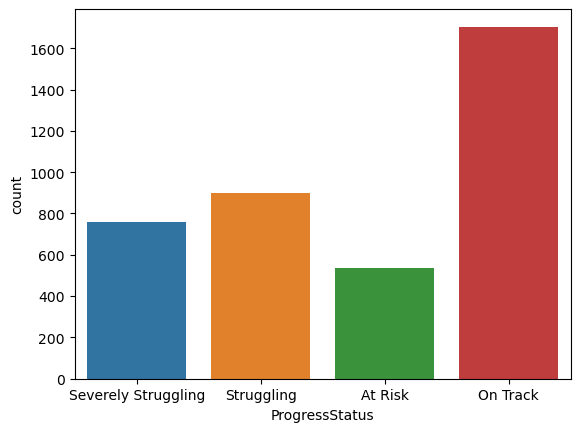

In [11]:
import seaborn as sns
sns.countplot(x='ProgressStatus',data=train_data)

In [12]:
# Applying SMOTE to balance the dataset
X = train_data.drop('ProgressStatus', axis=1)
y = train_data['ProgressStatus']
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [28]:
X.columns

Index(['HouseholdSize', 'TimeToOPD', 'TimeToWater', 'AgricultureLand',
       'Season1CropsPlanted', 'Season2CropsPlanted', 'PerennialCropsGrown',
       'VSLA_Profits', 'VSLA_Profits.1', 'Season1VegetableIncome',
       ...
       'Loan_from_8', 'Loan_from_8 97', 'Loan_from_97', 'Loan_from_99',
       'food_banana_wilt_diseases_1 2', 'food_banana_wilt_diseases_1 2 3',
       'food_banana_wilt_diseases_1 3', 'food_banana_wilt_diseases_2',
       'food_banana_wilt_diseases_2 3', 'food_banana_wilt_diseases_3'],
      dtype='object', length=264)

In [13]:
#Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Exploratory Data Analysis

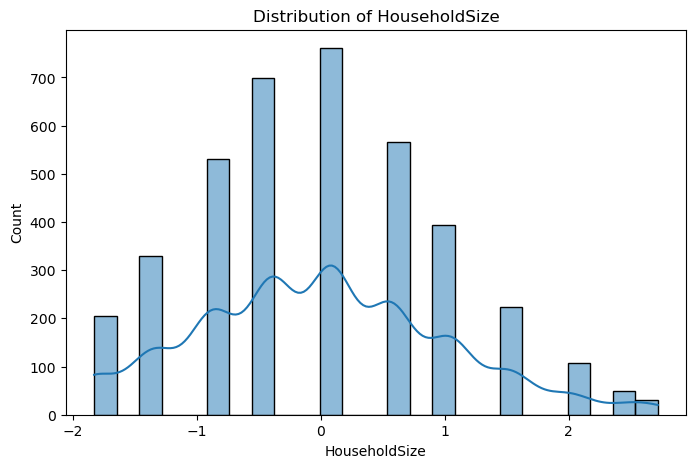

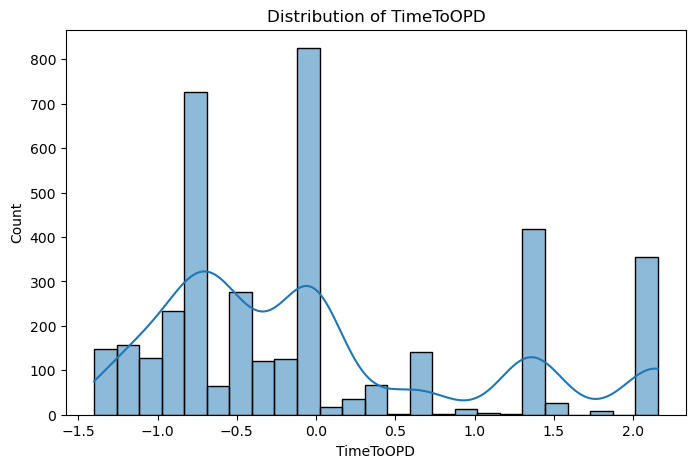

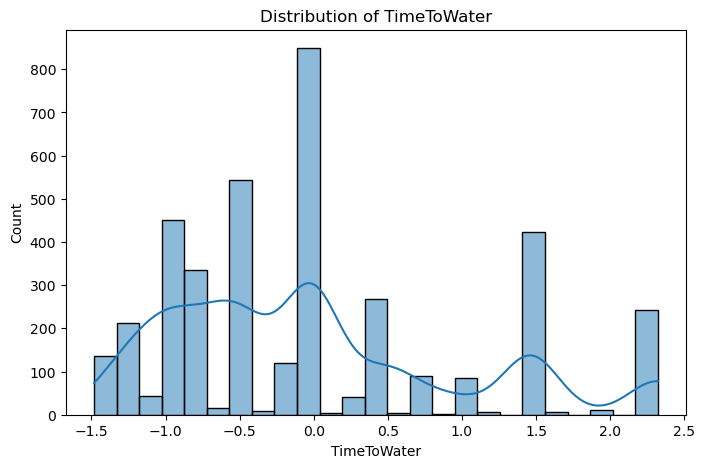

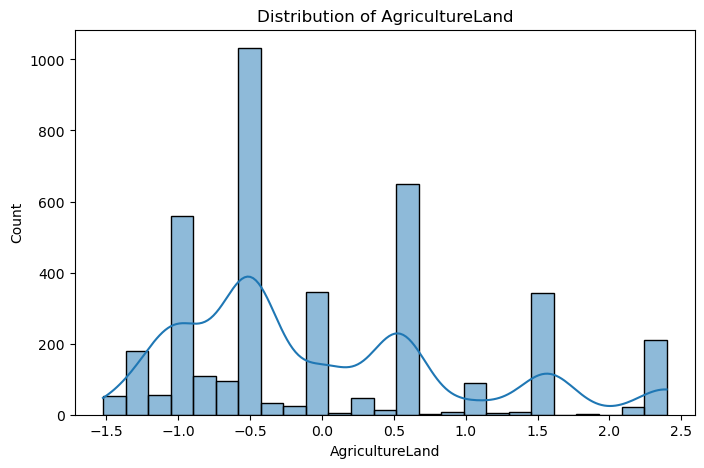

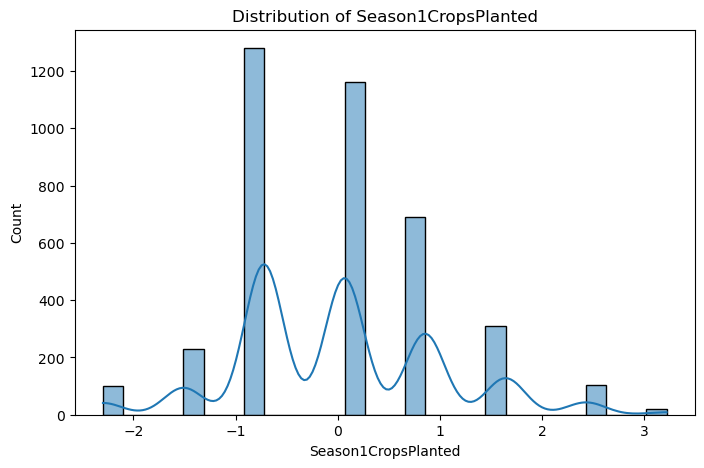

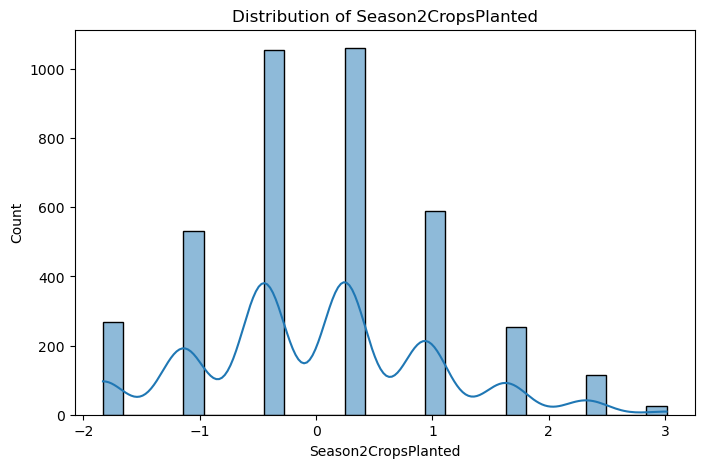

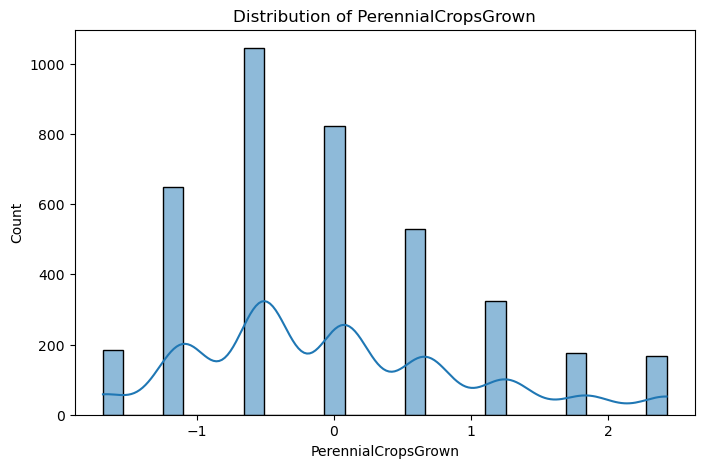

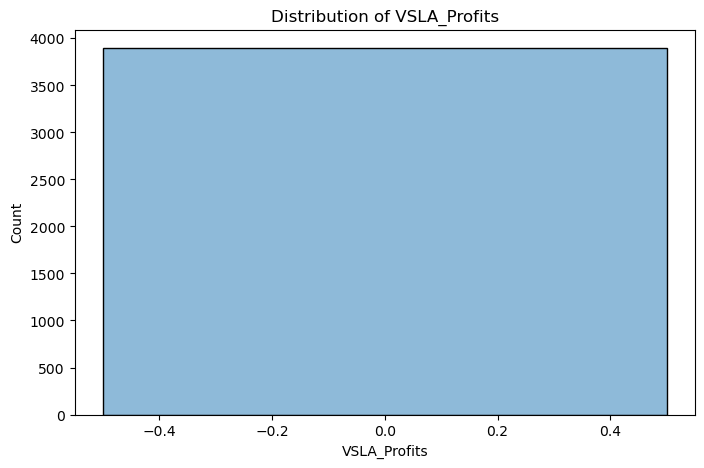

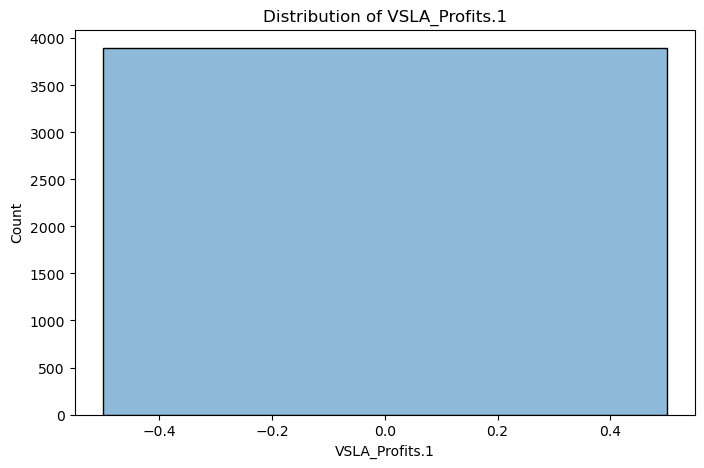

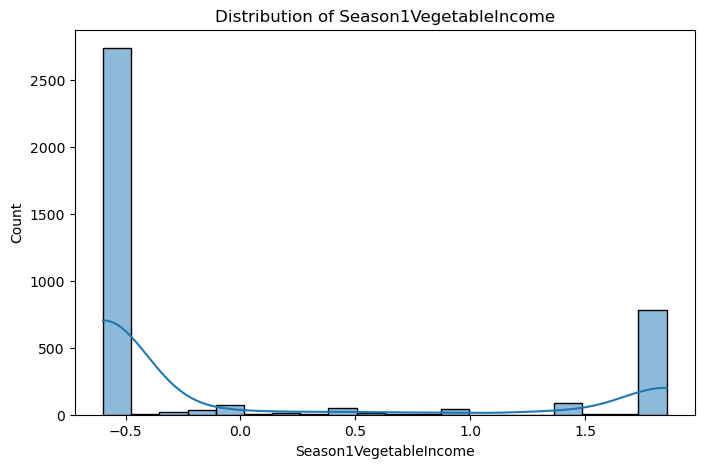

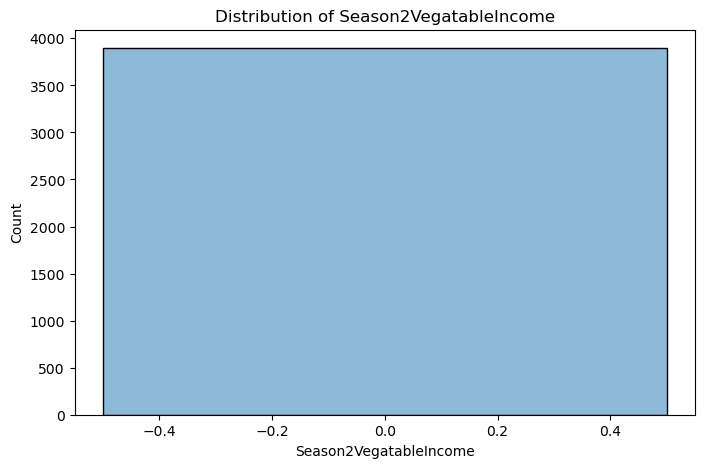

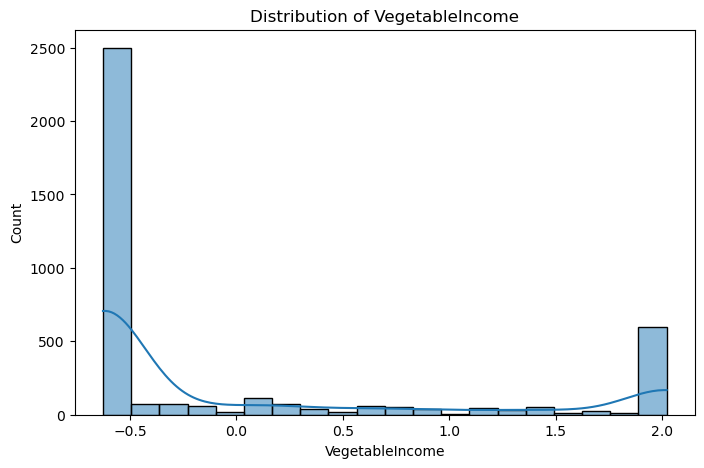

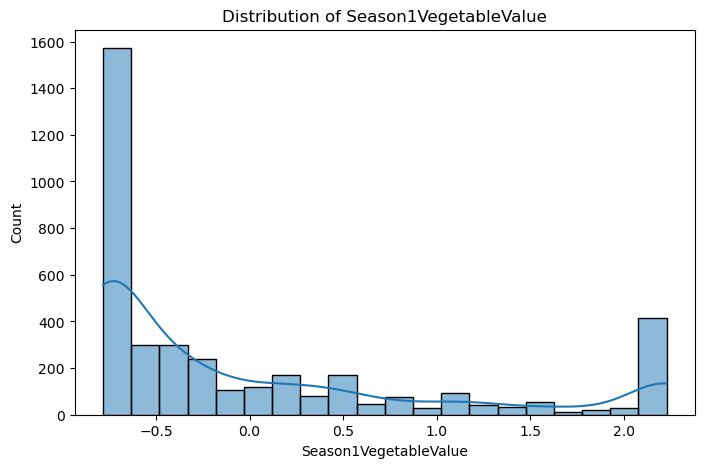

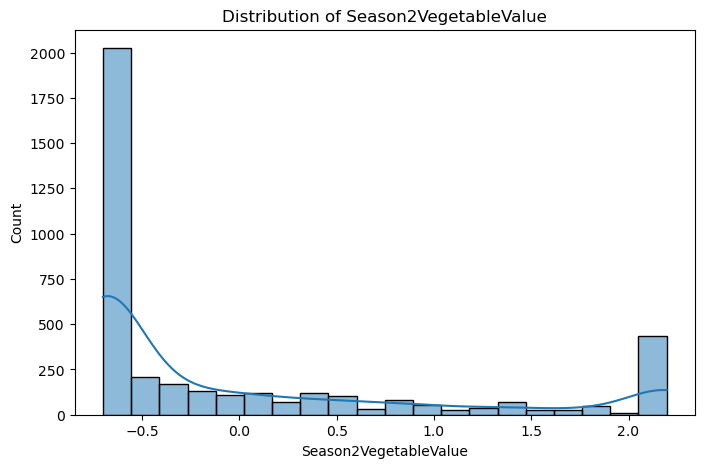

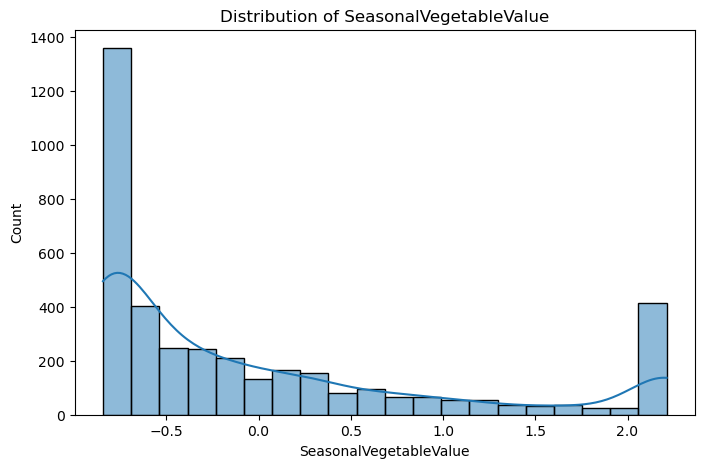

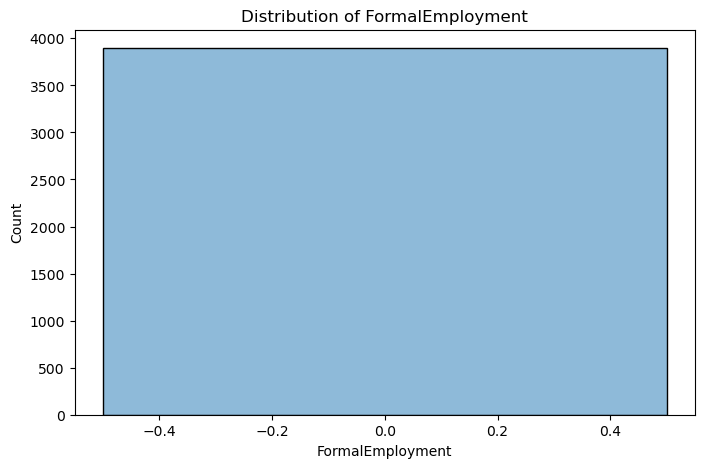

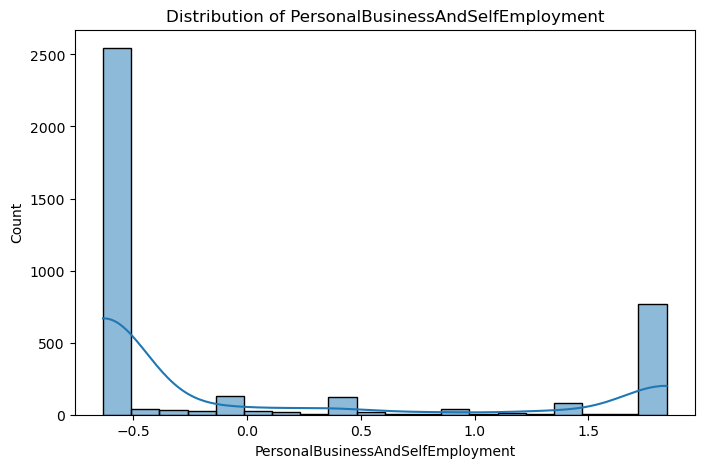

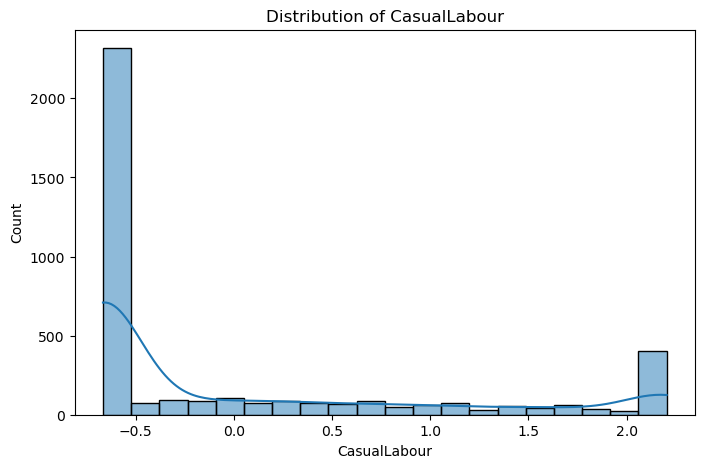

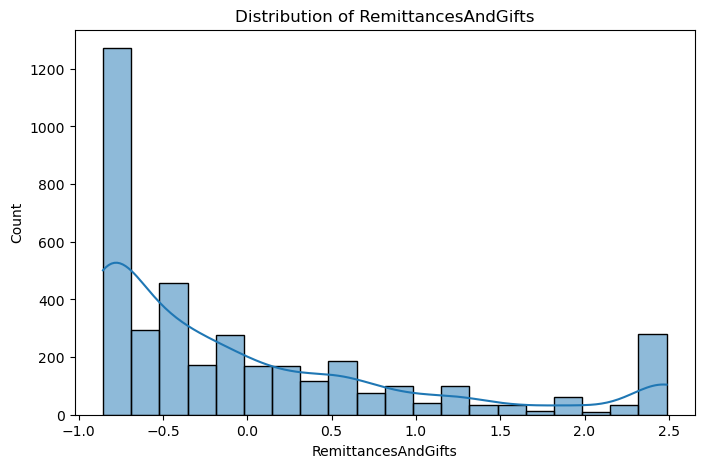

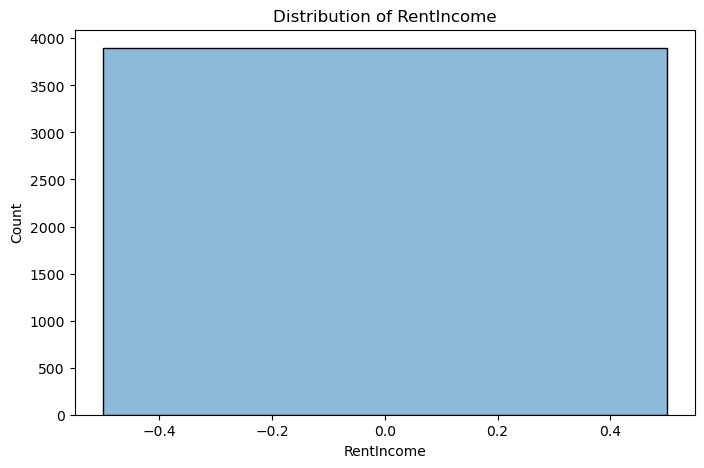

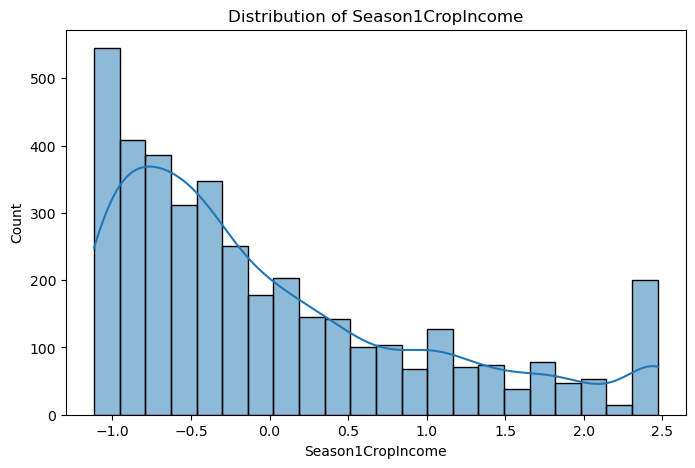

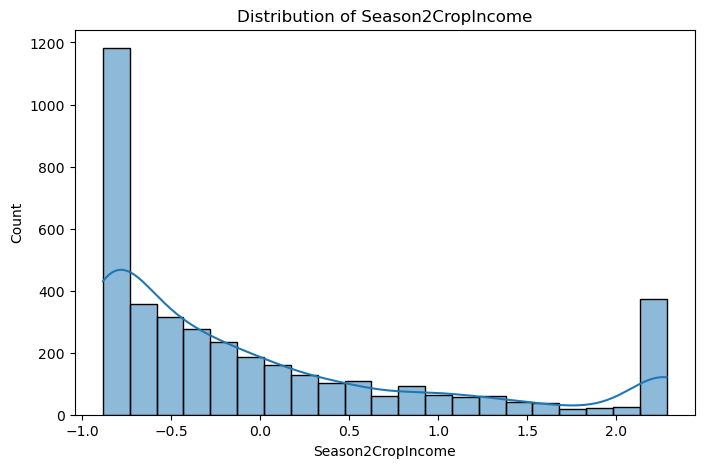

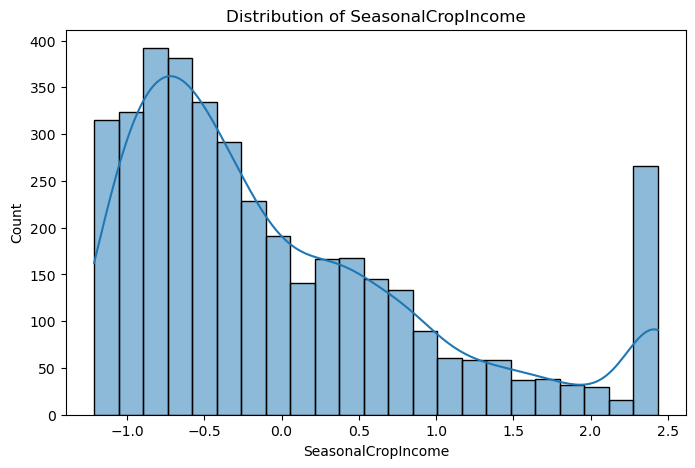

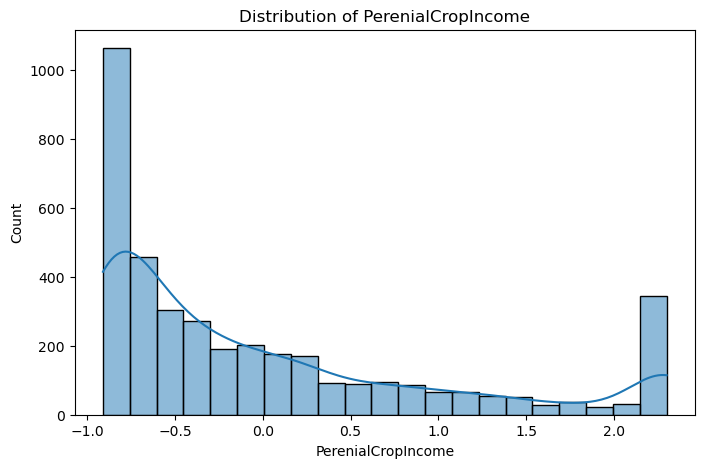

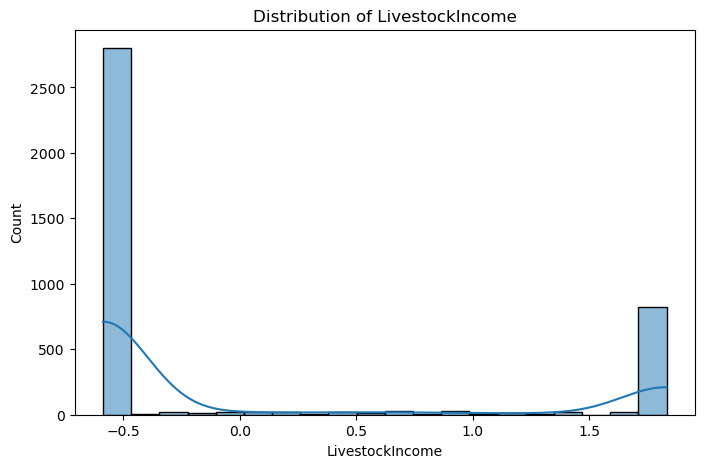

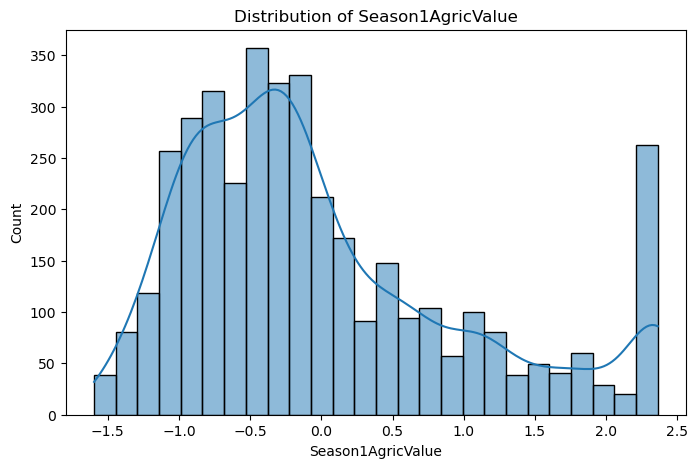

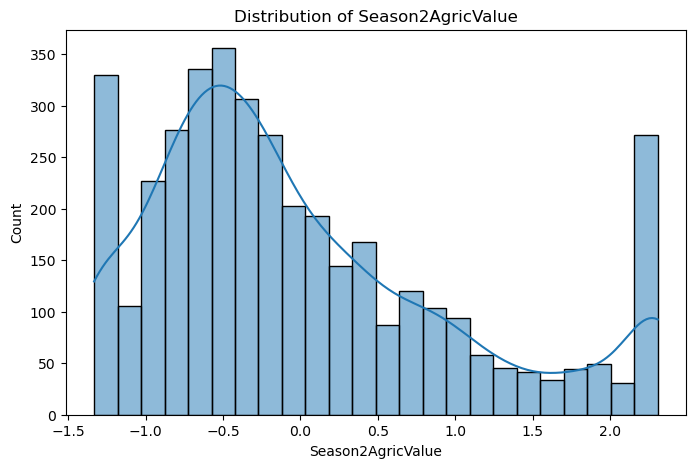

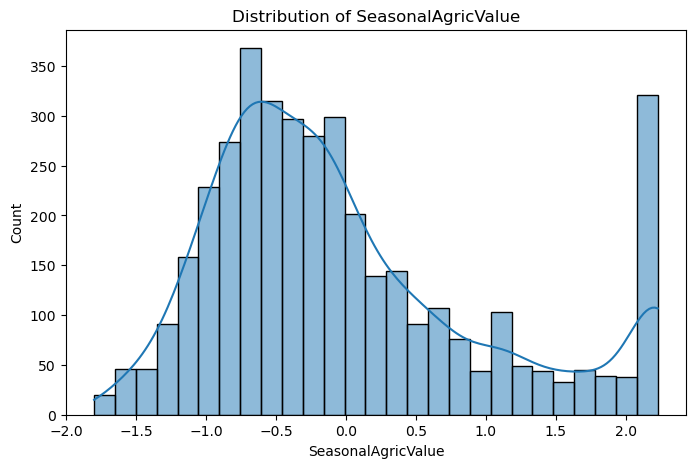

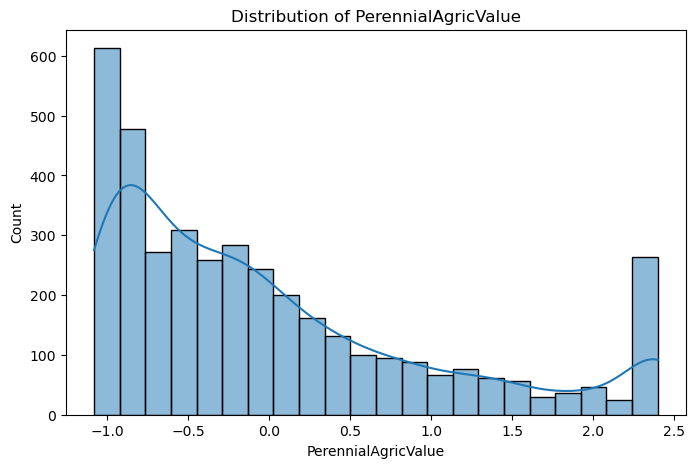

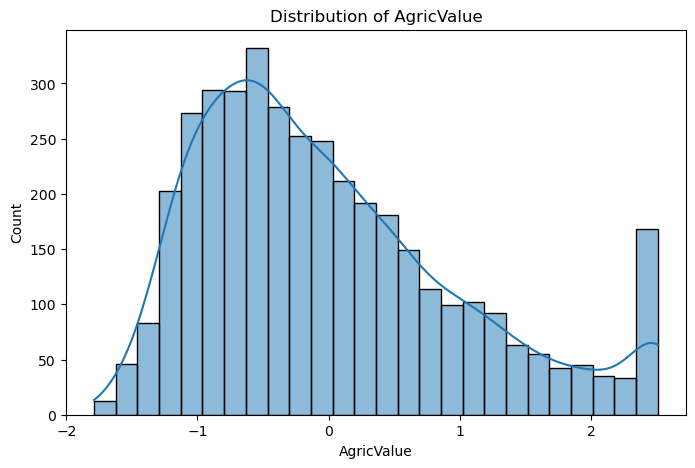

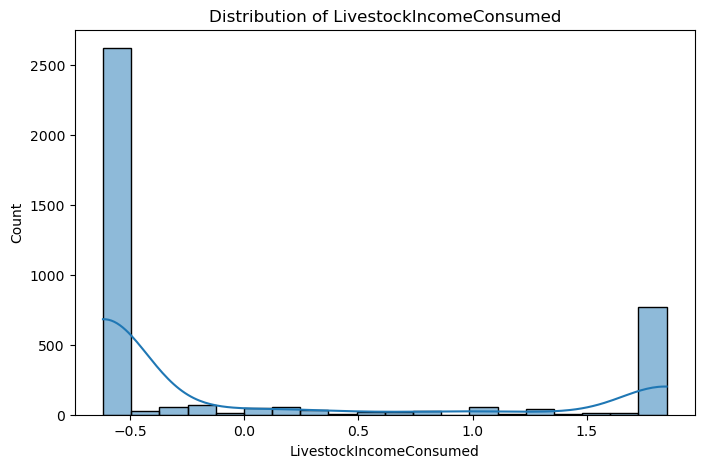

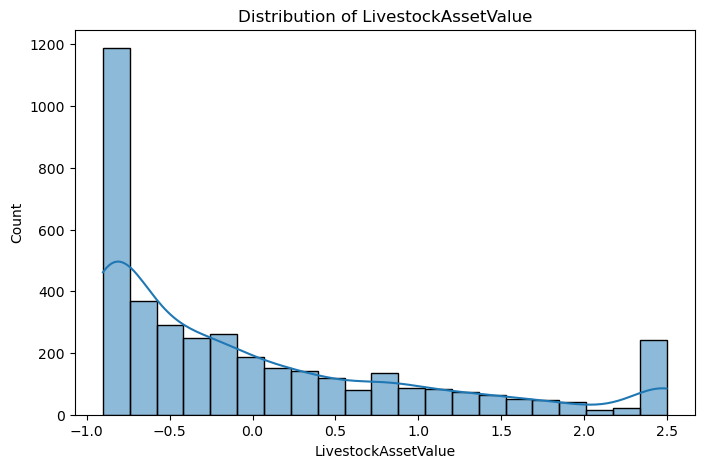

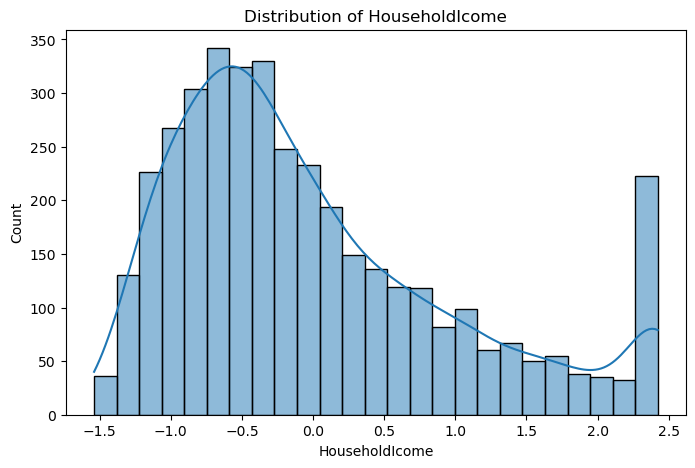

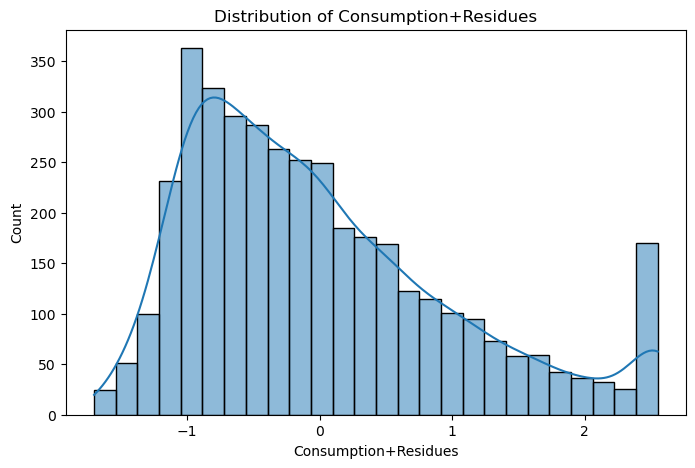

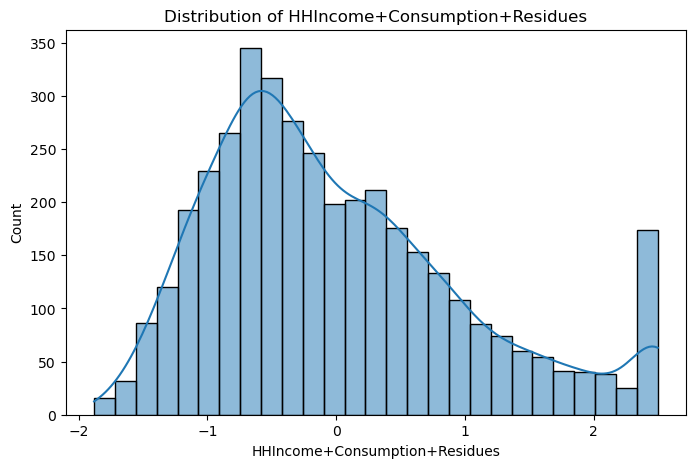

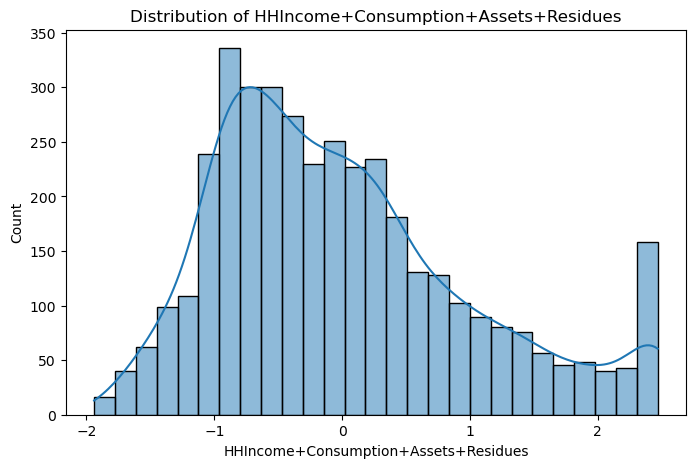

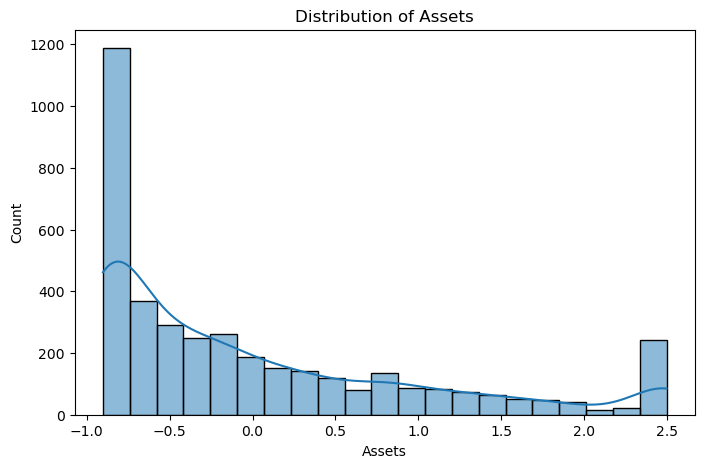

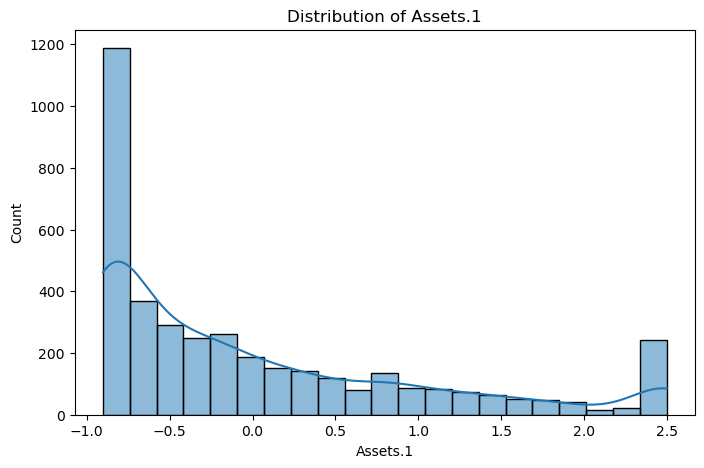

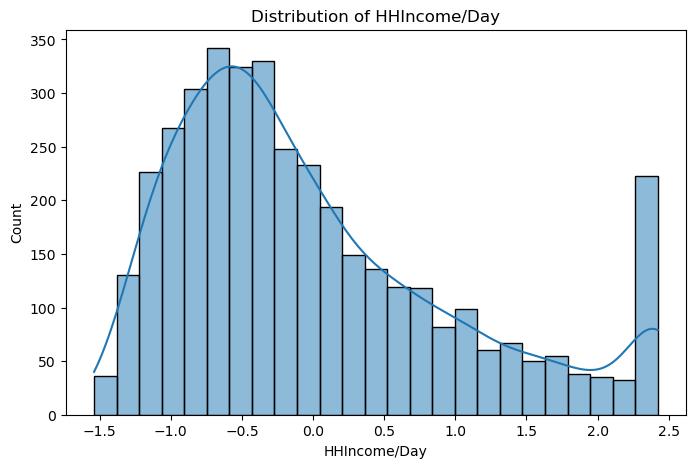

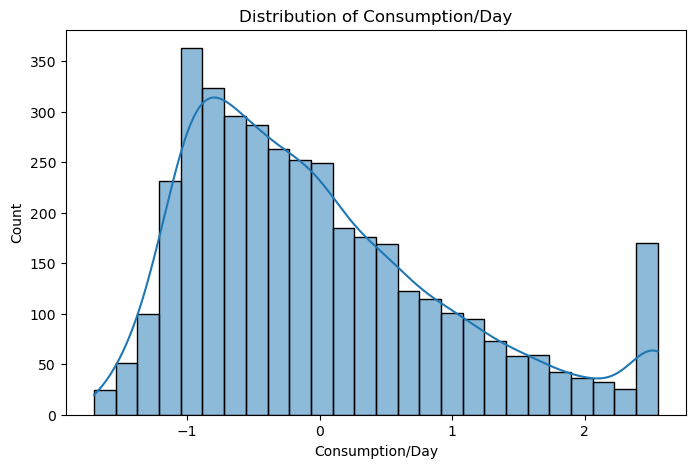

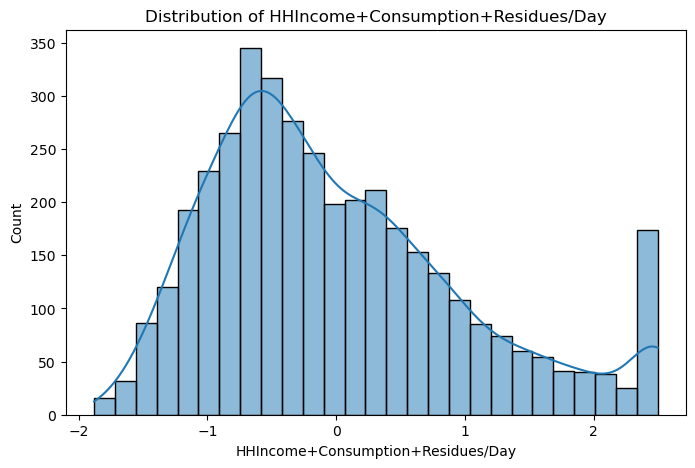

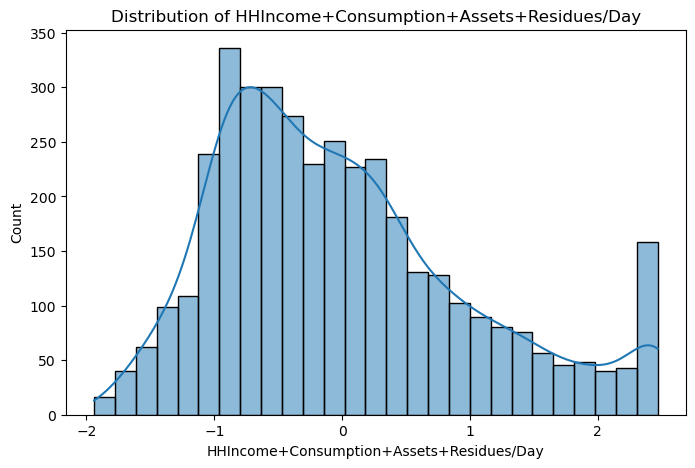

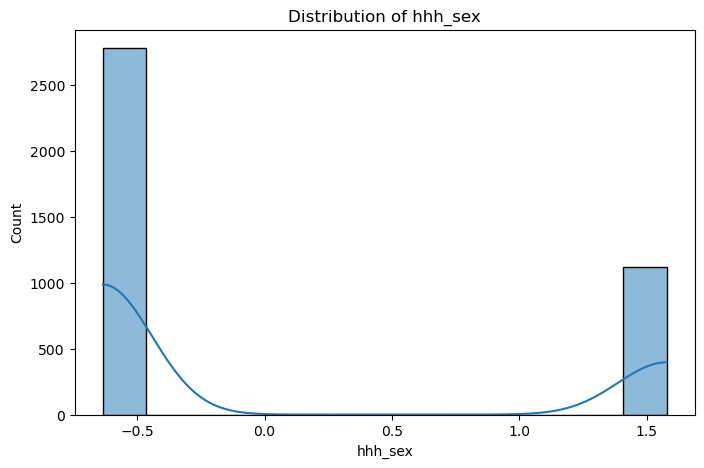

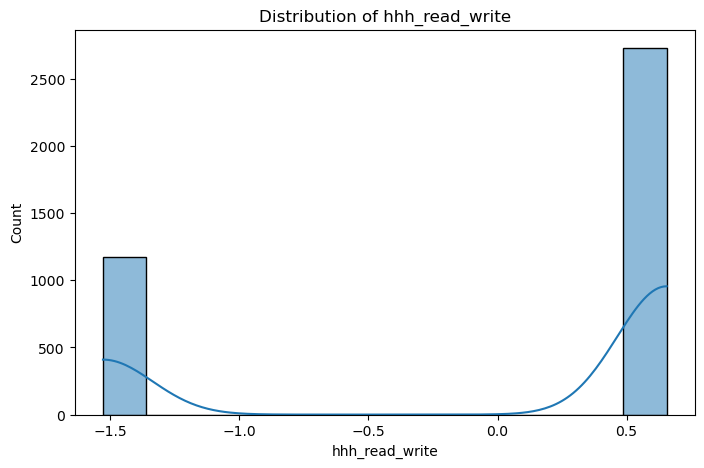

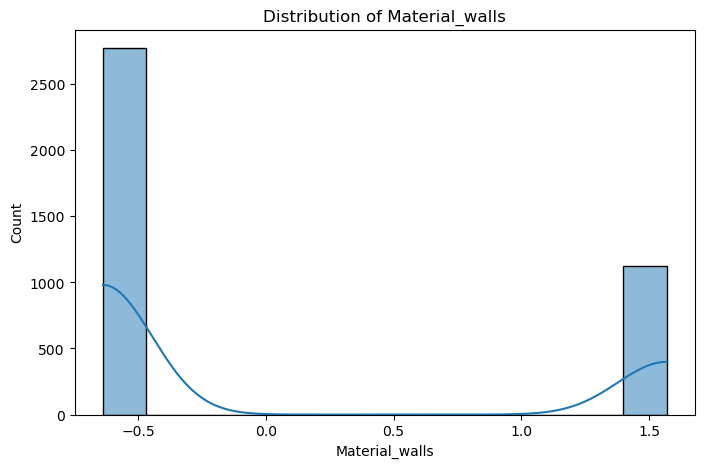

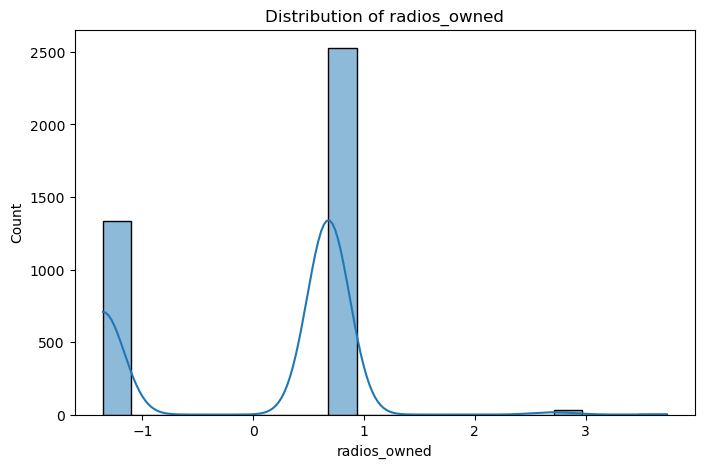

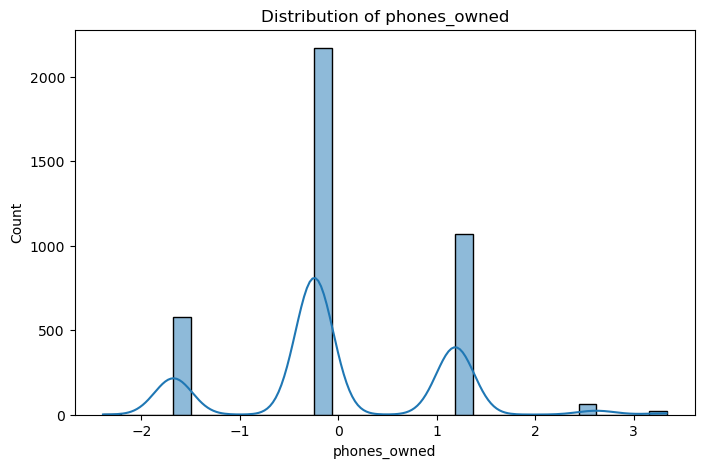

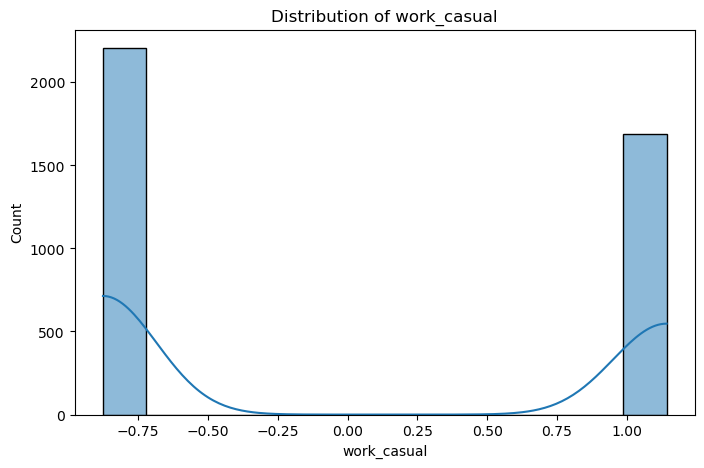

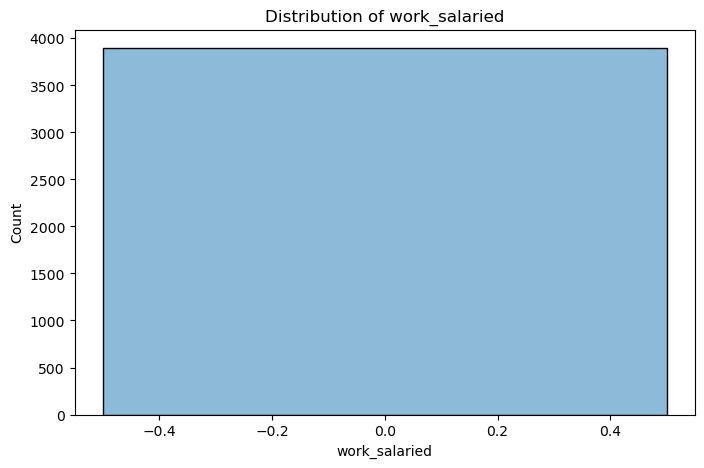

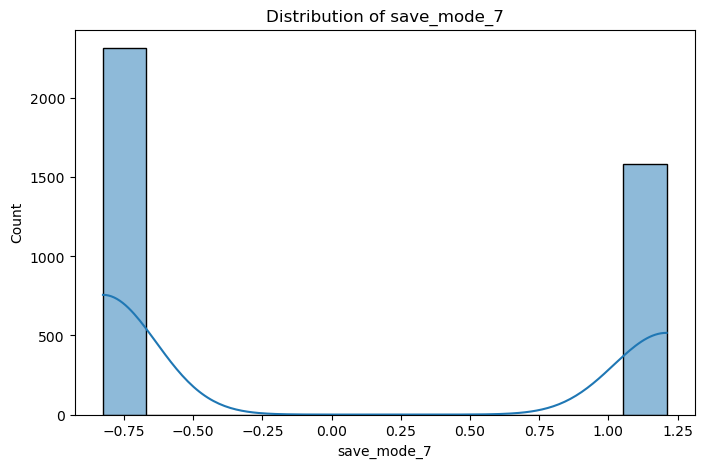

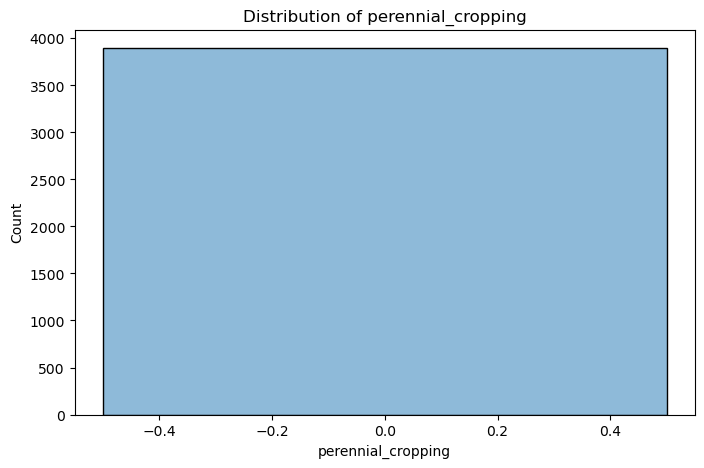

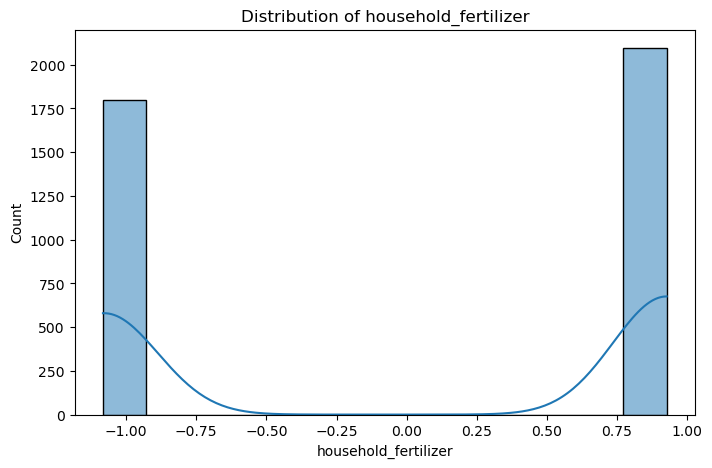

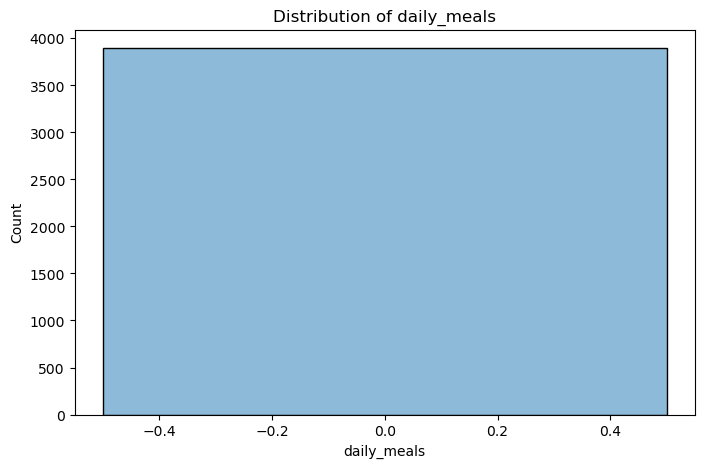

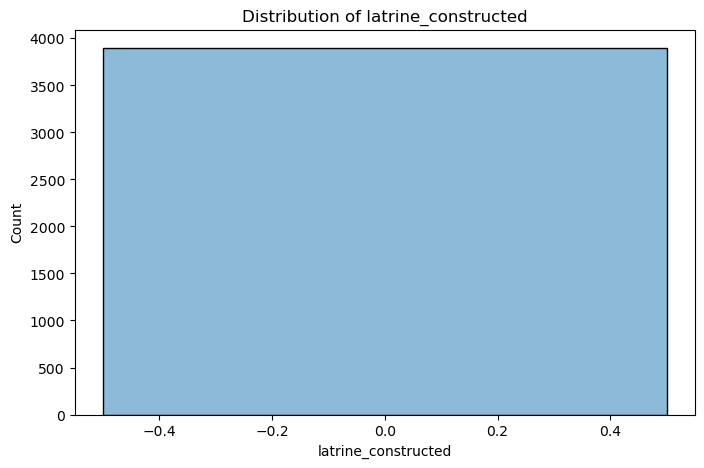

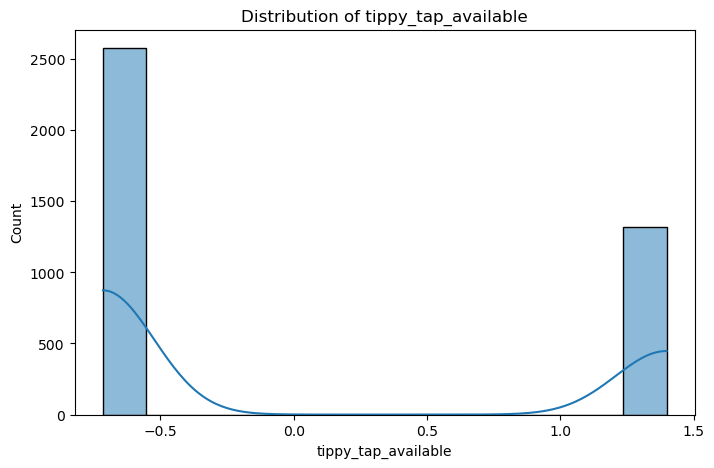

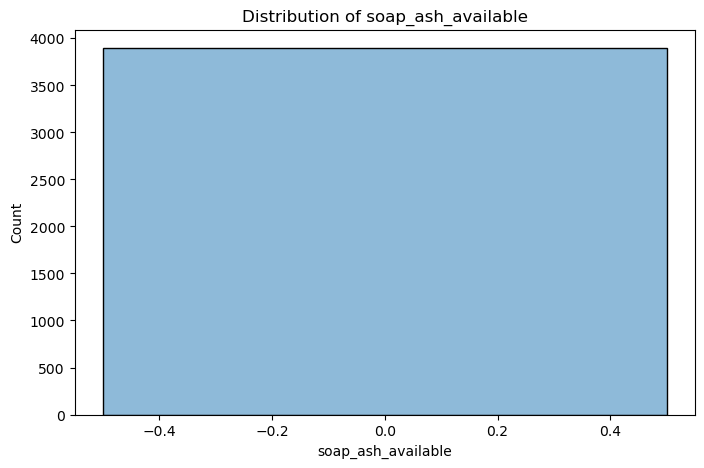

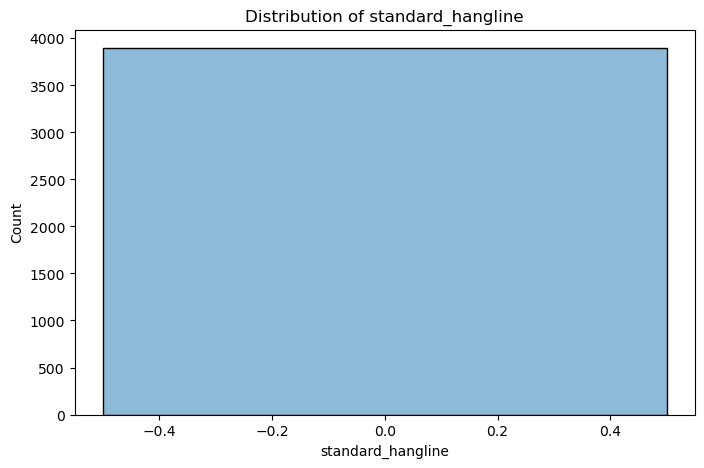

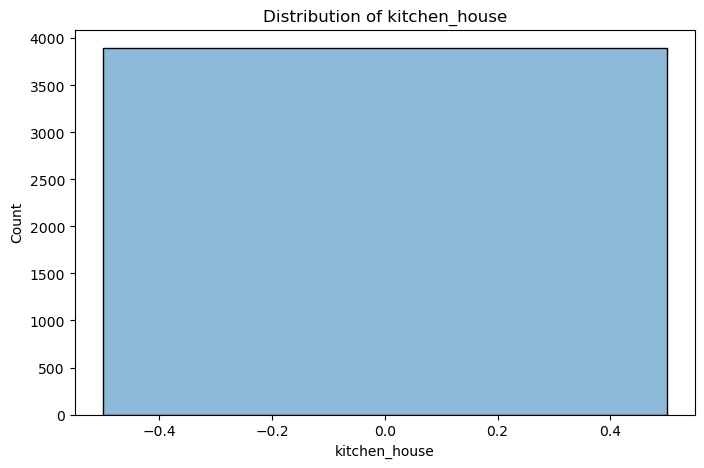

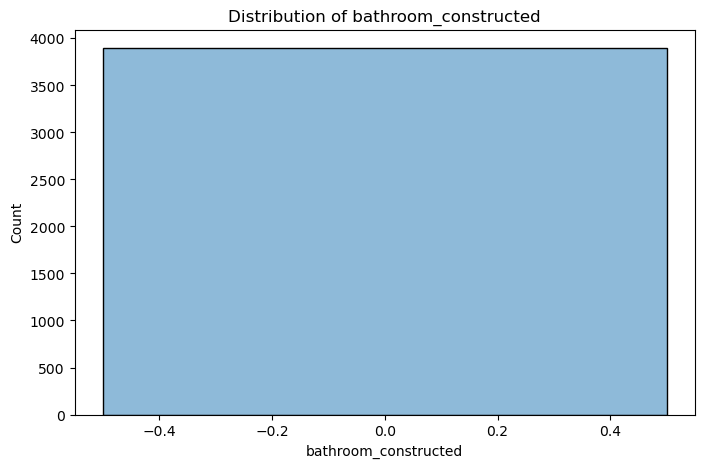

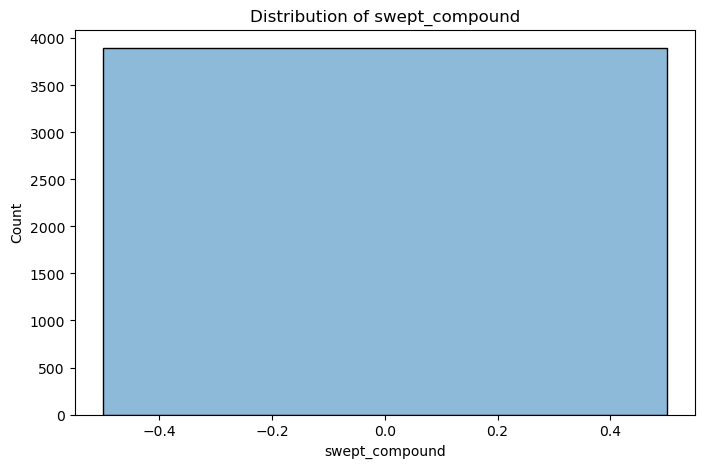

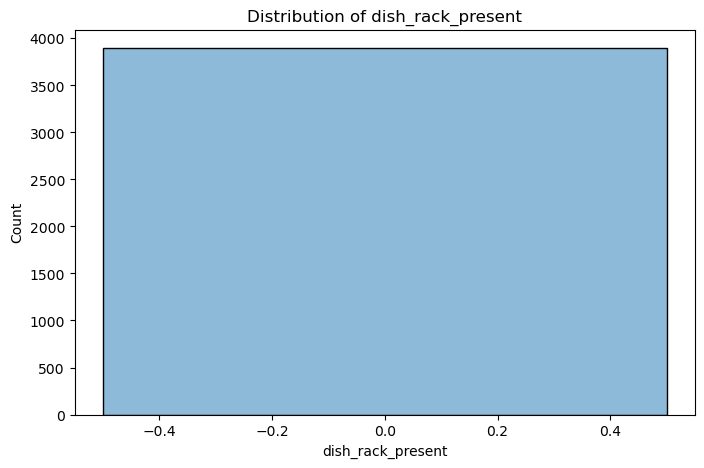

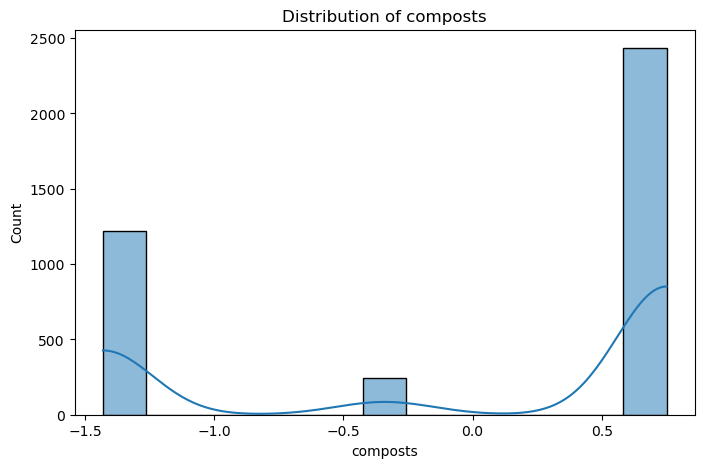

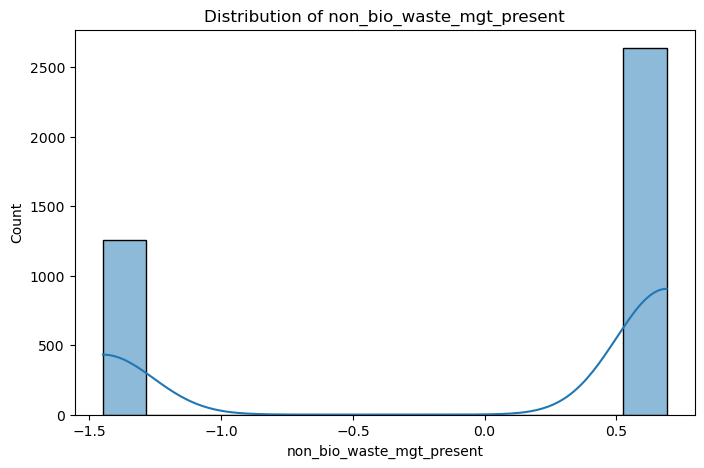

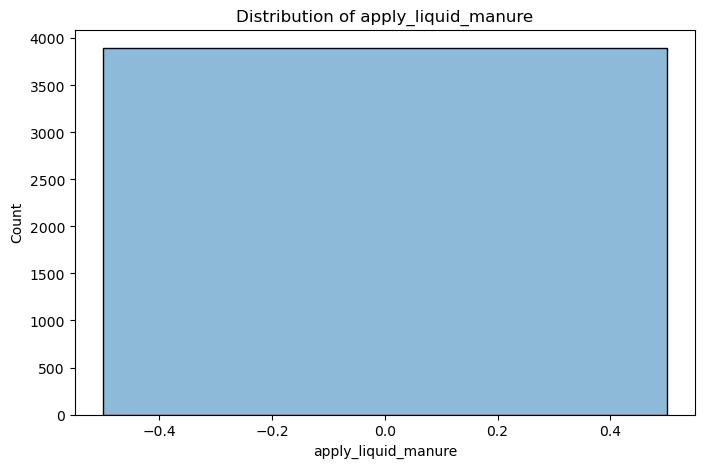

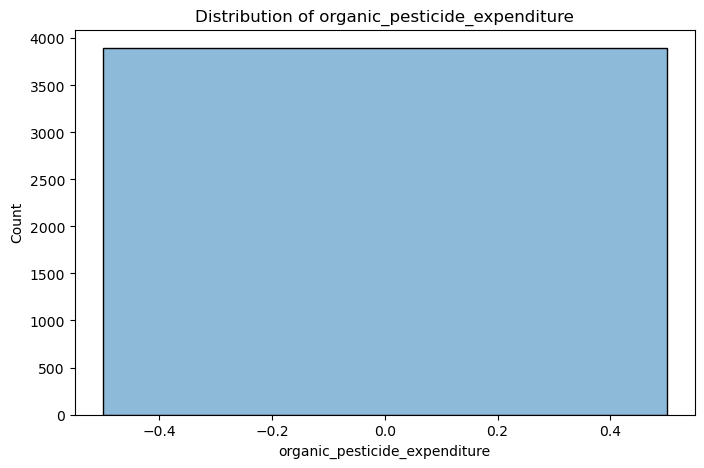

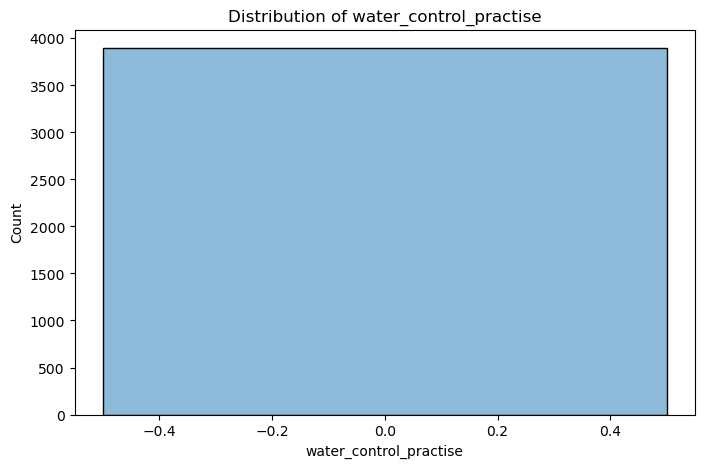

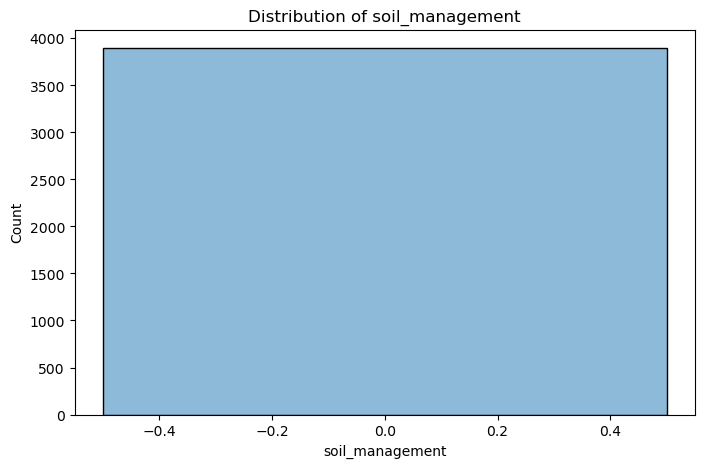

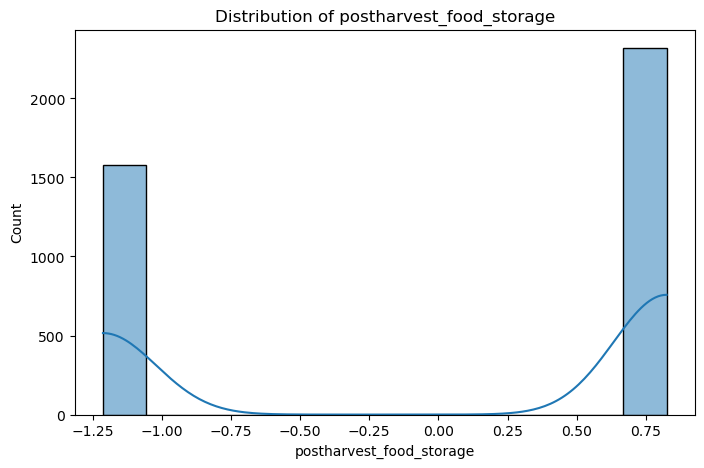

In [16]:
import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

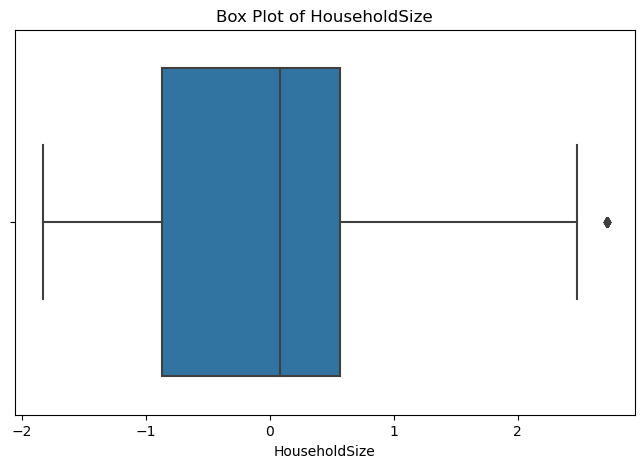

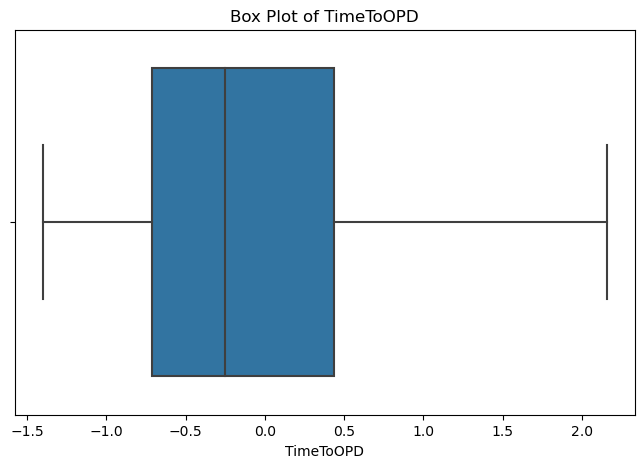

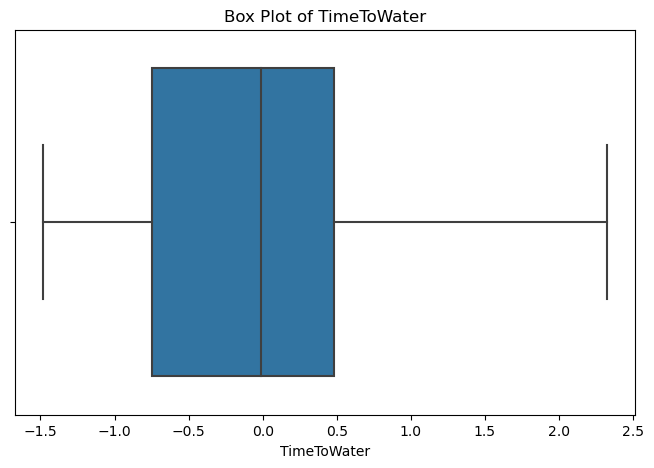

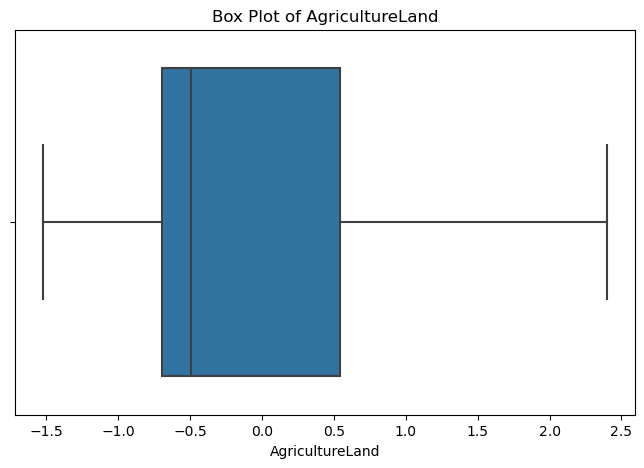

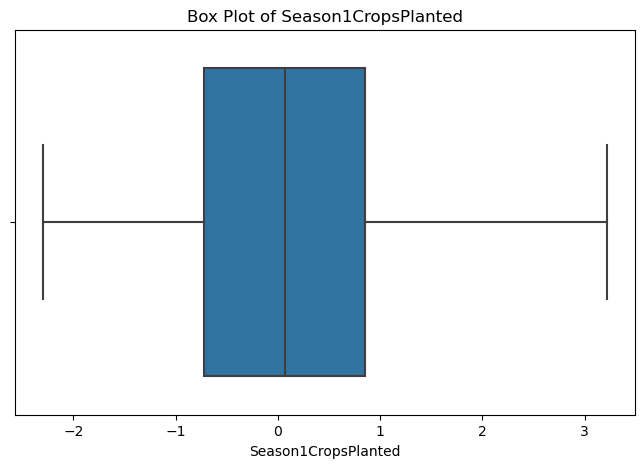

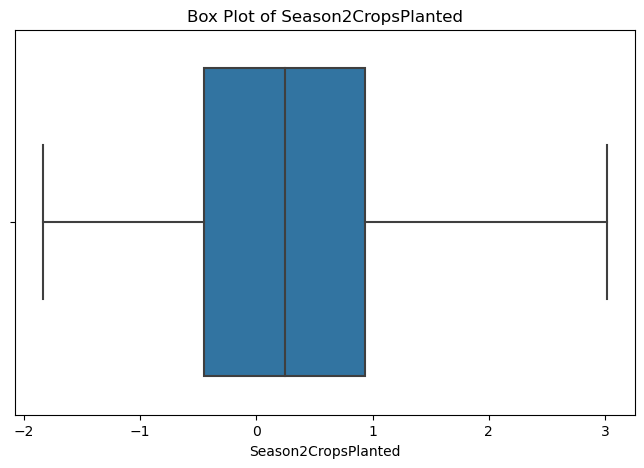

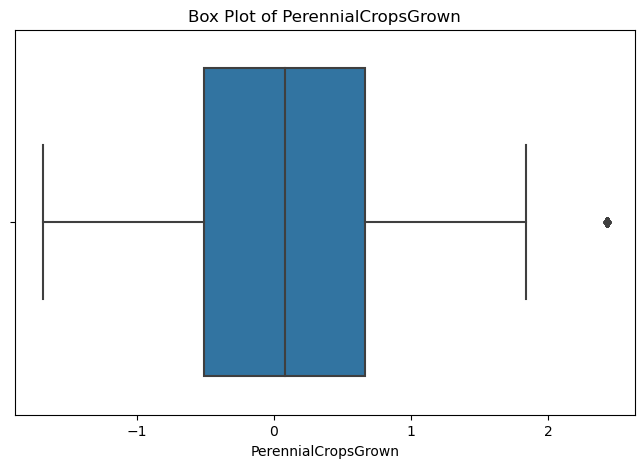

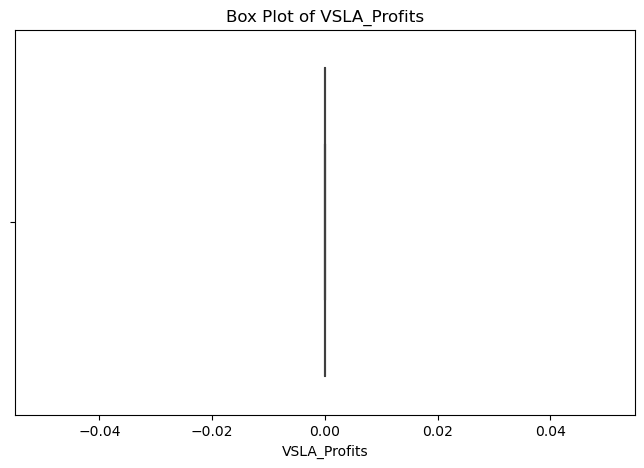

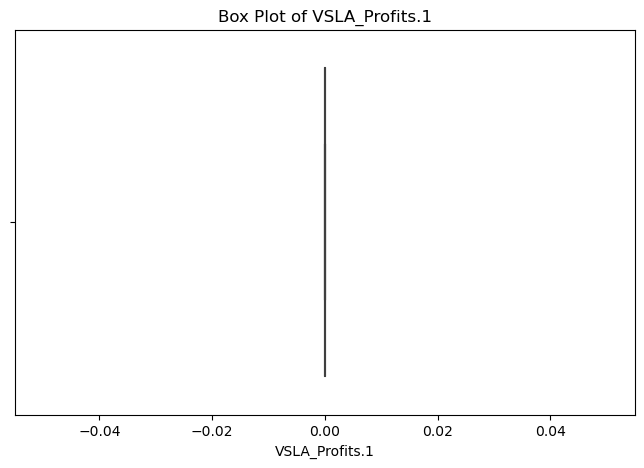

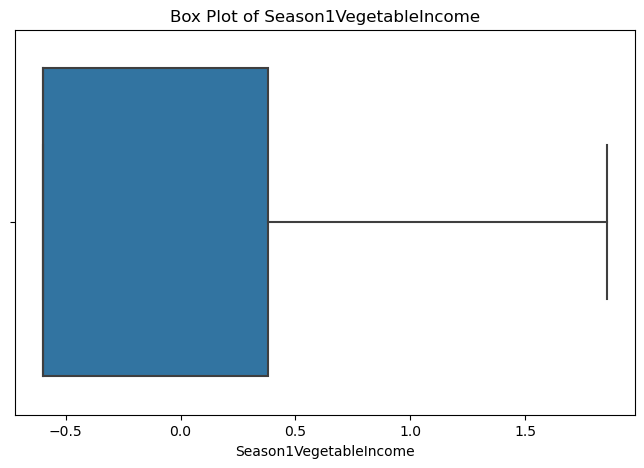

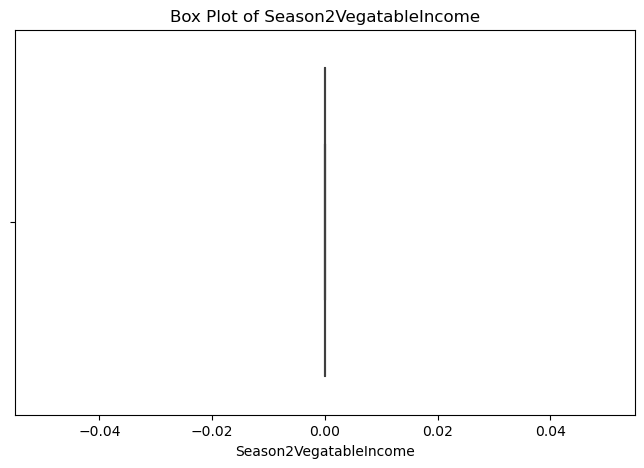

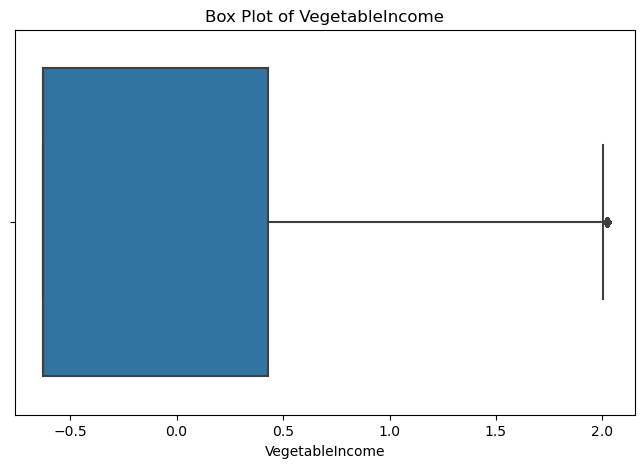

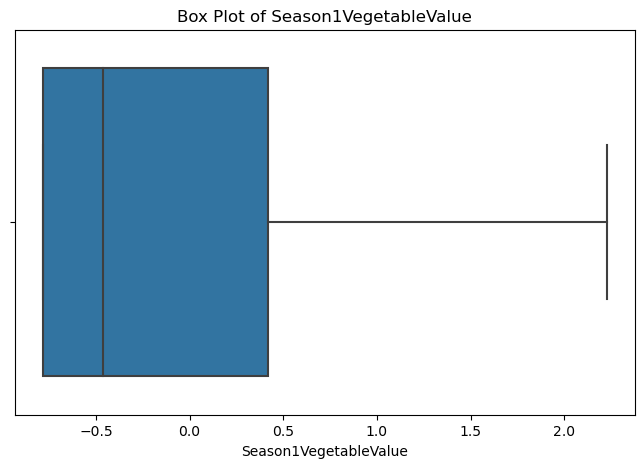

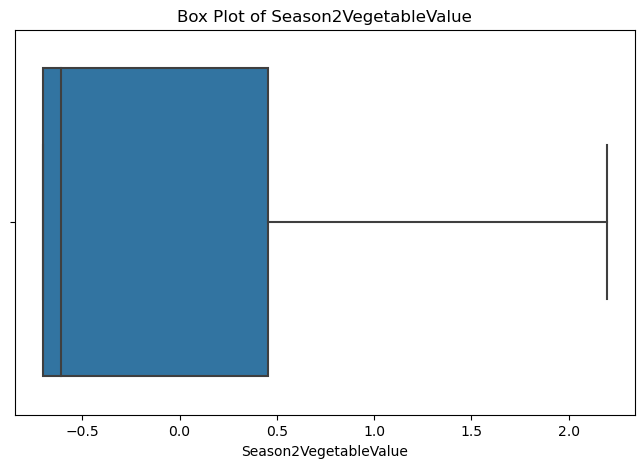

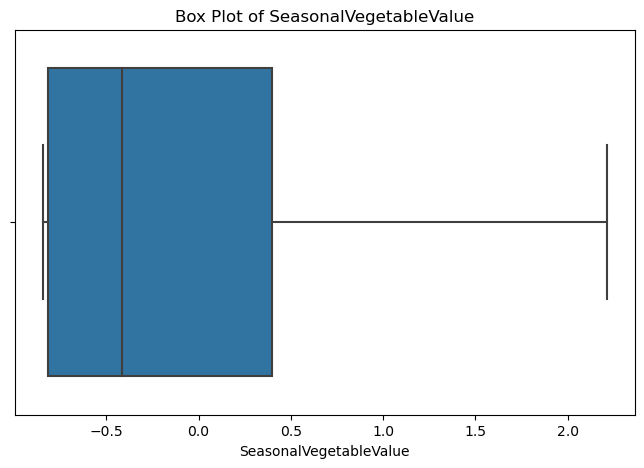

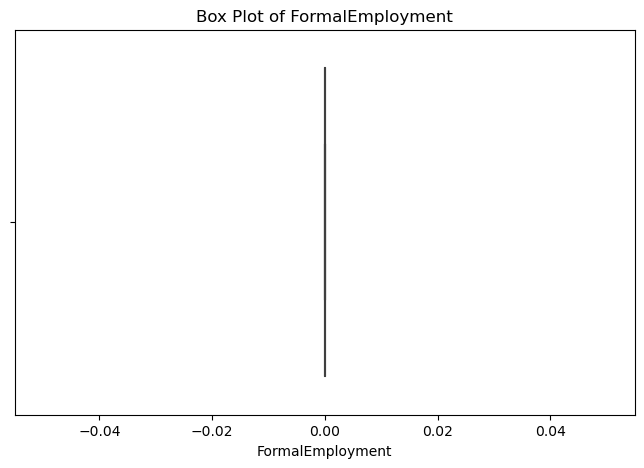

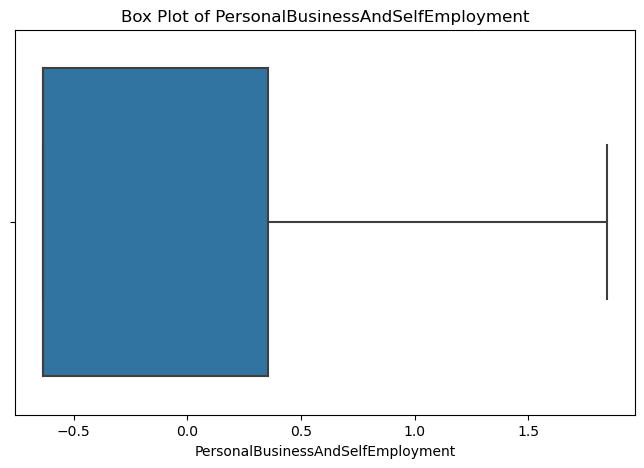

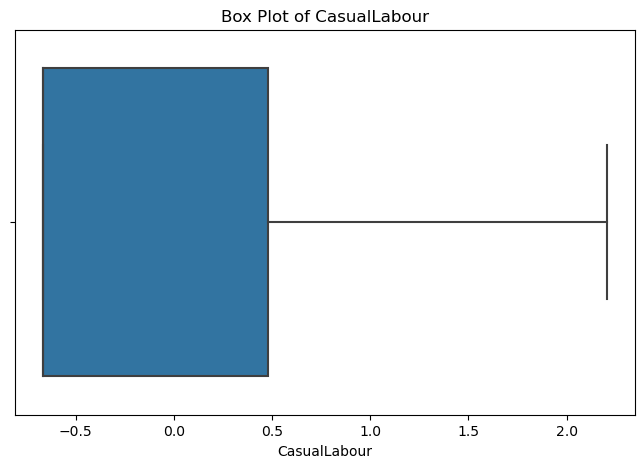

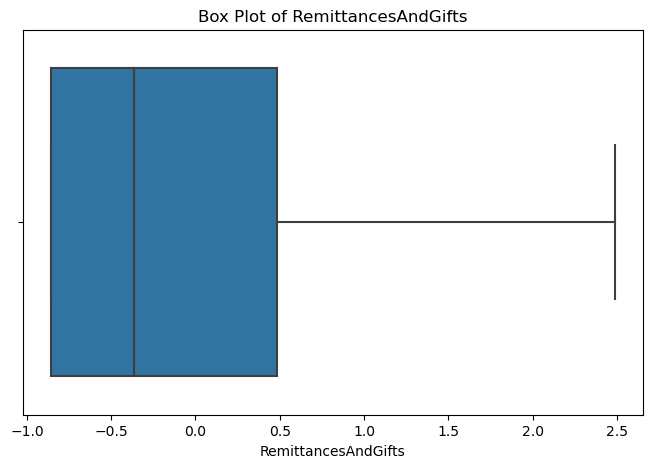

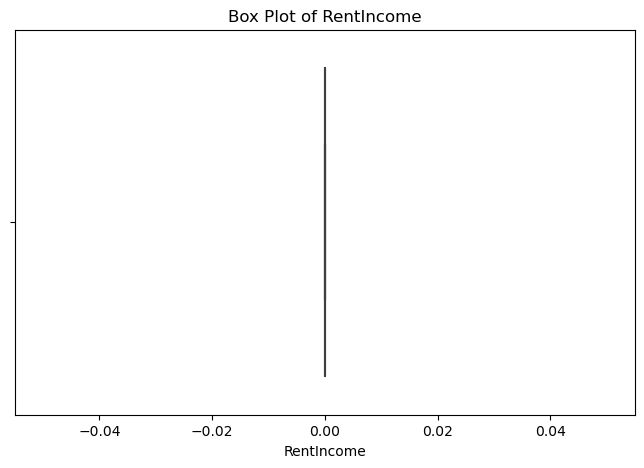

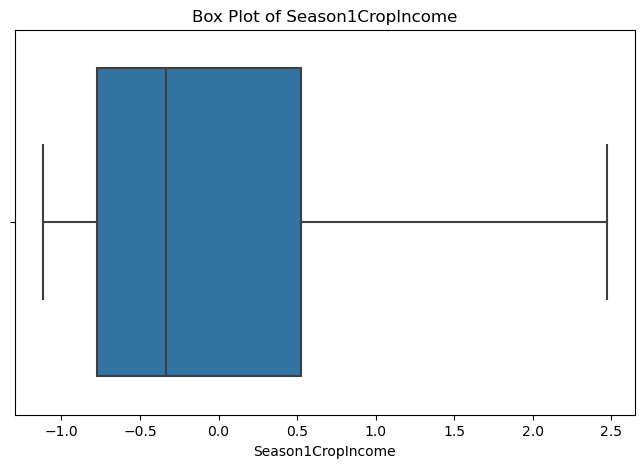

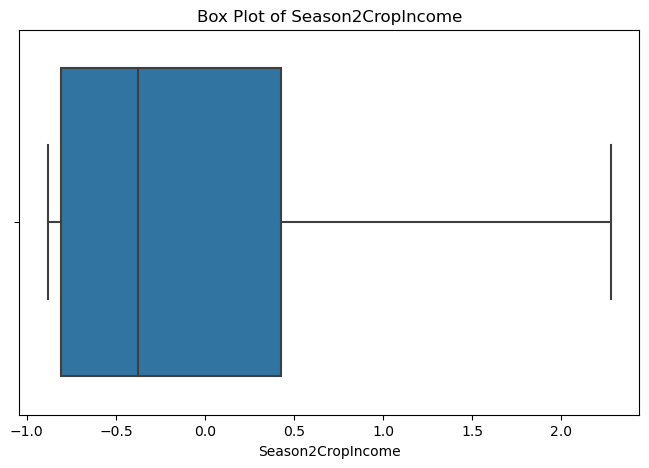

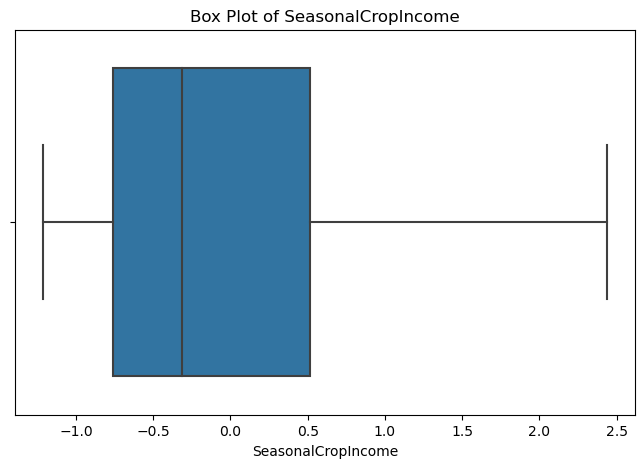

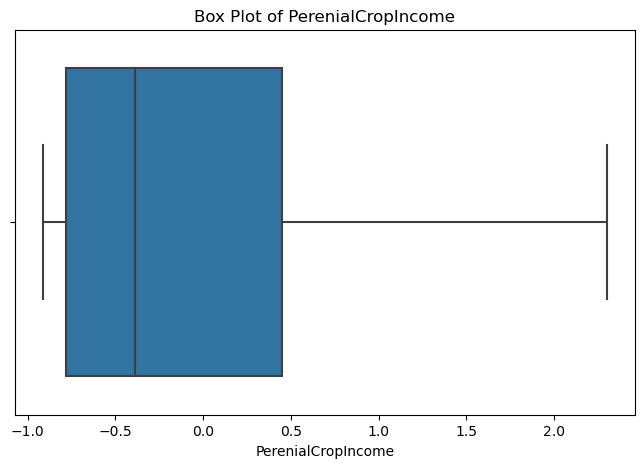

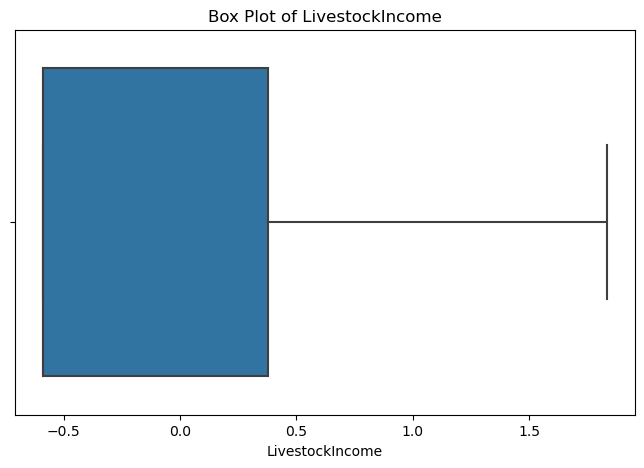

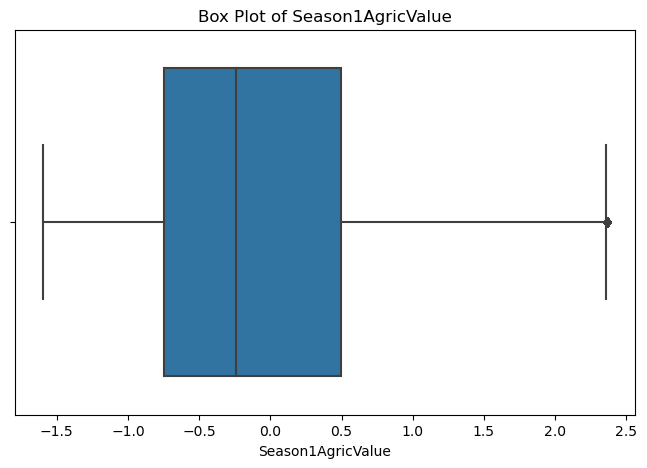

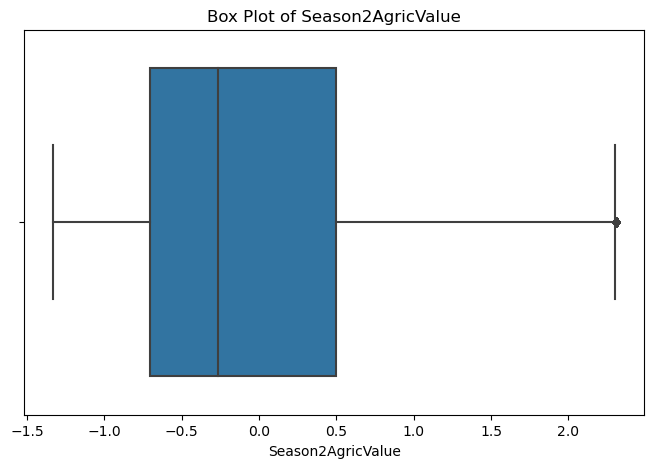

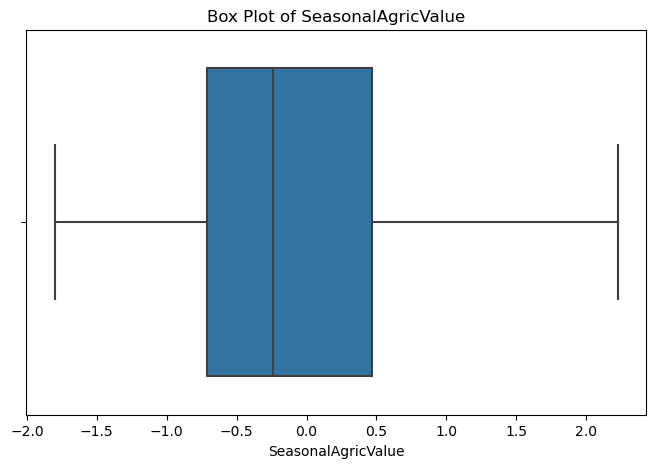

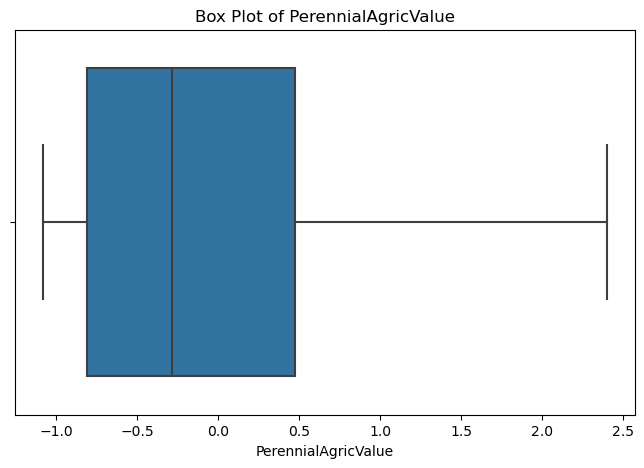

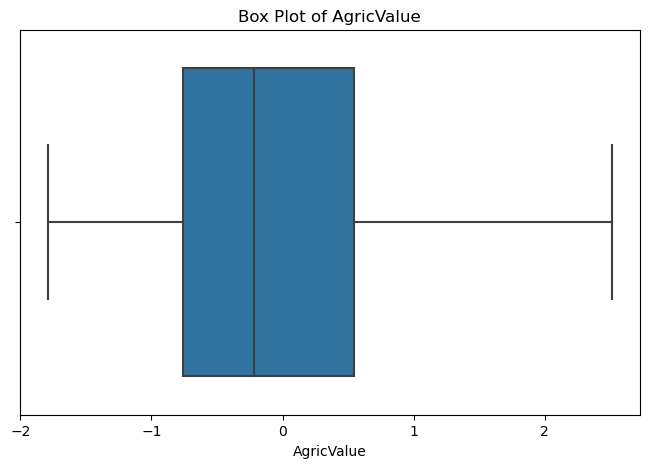

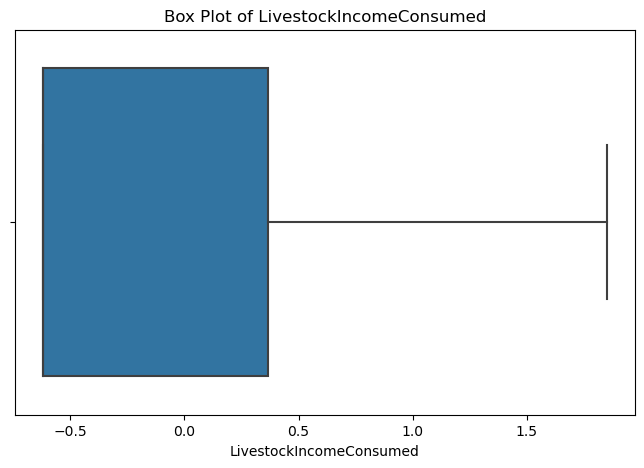

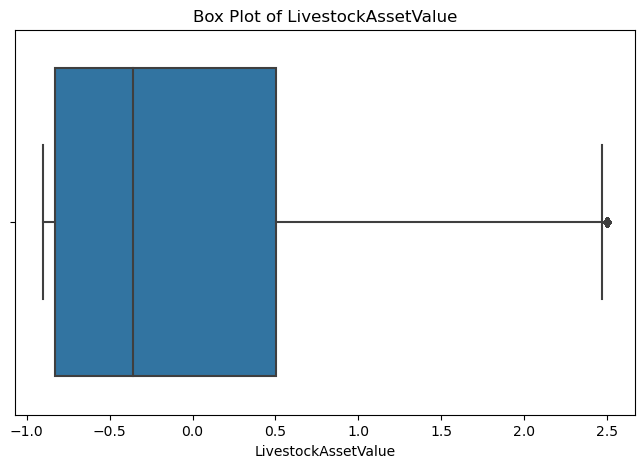

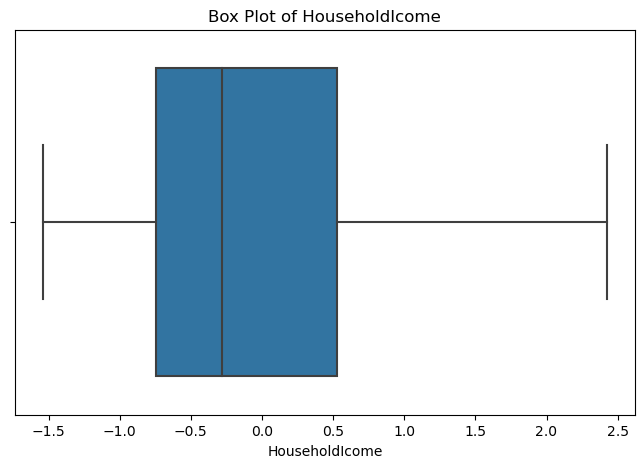

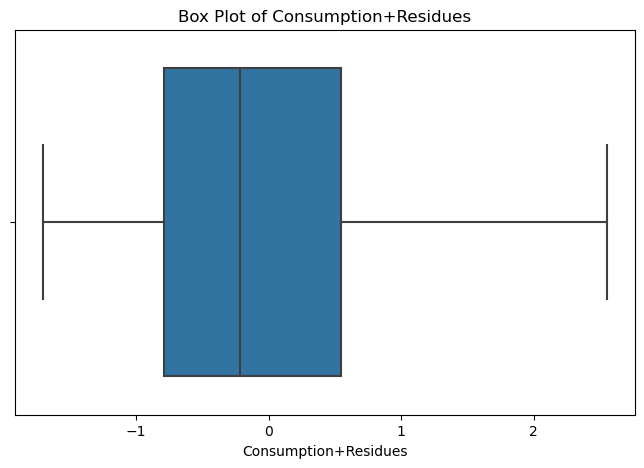

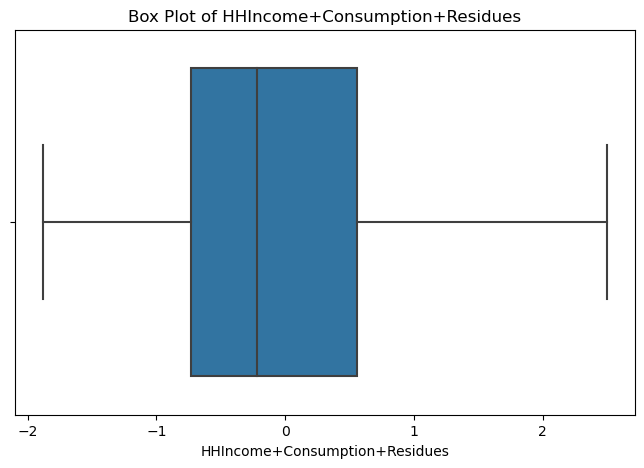

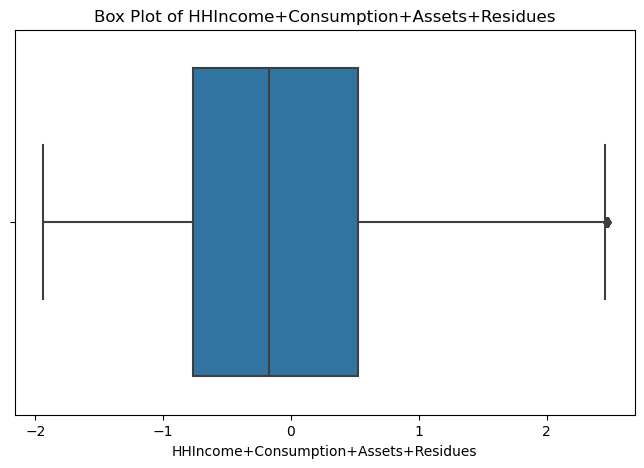

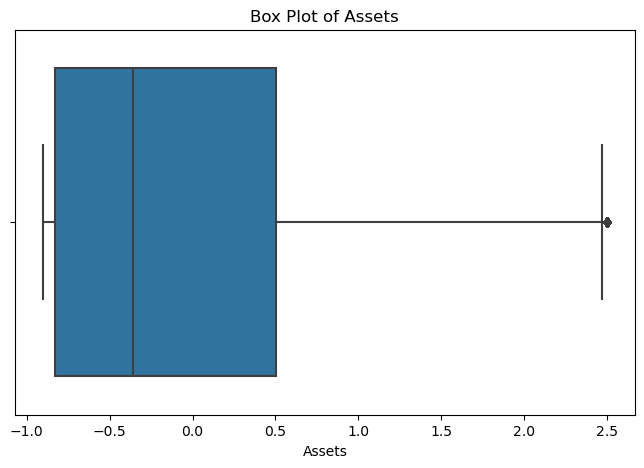

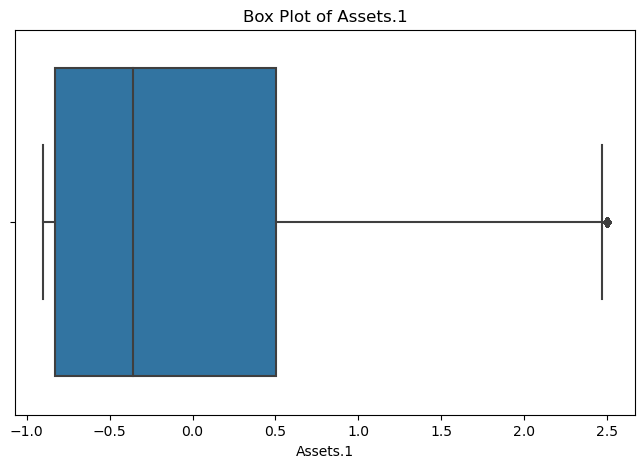

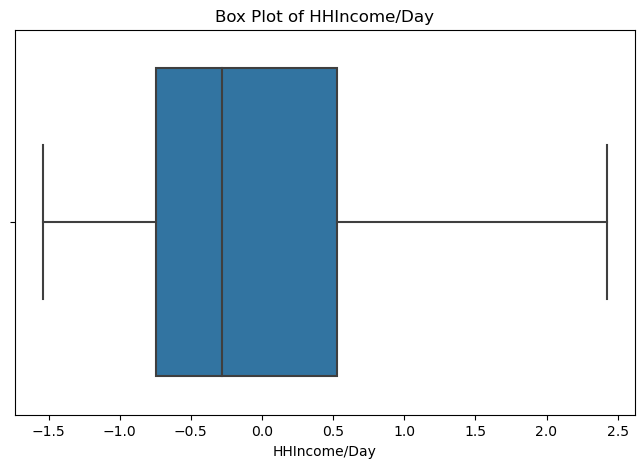

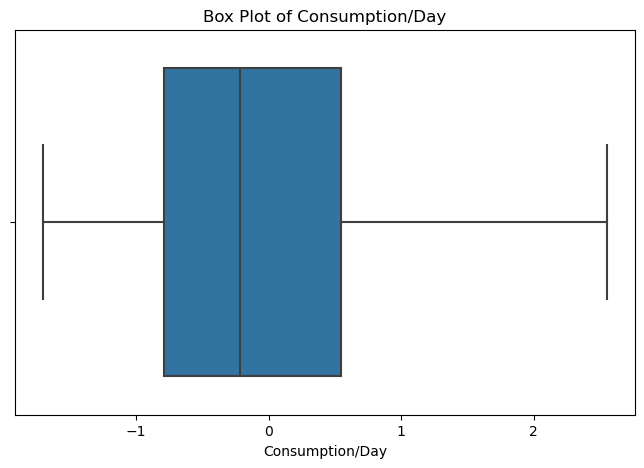

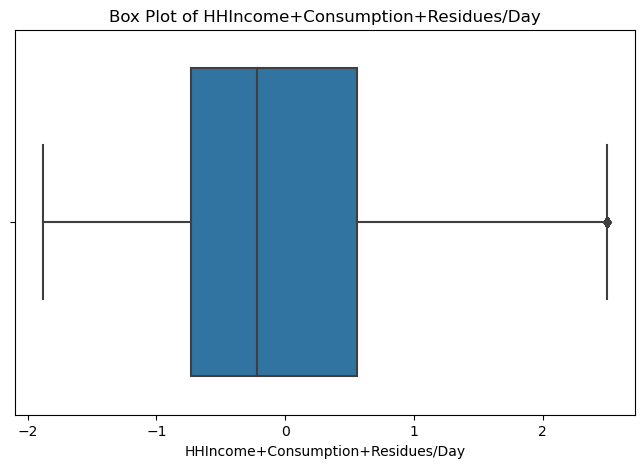

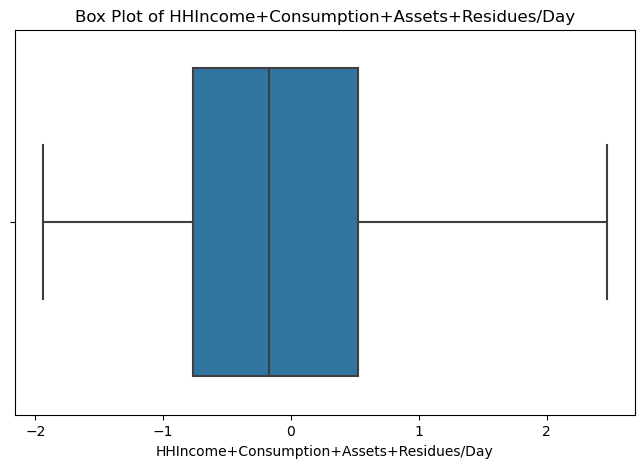

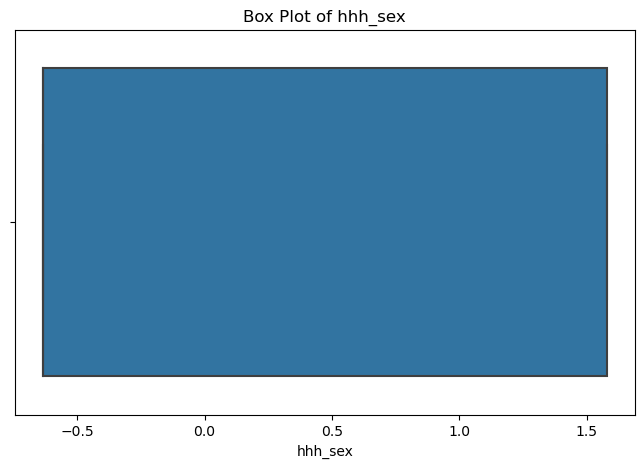

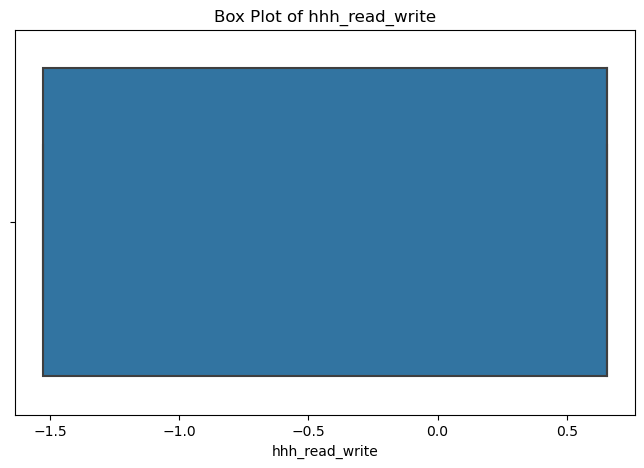

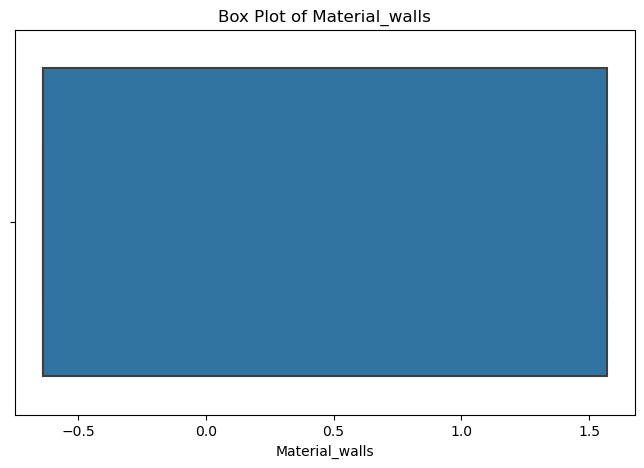

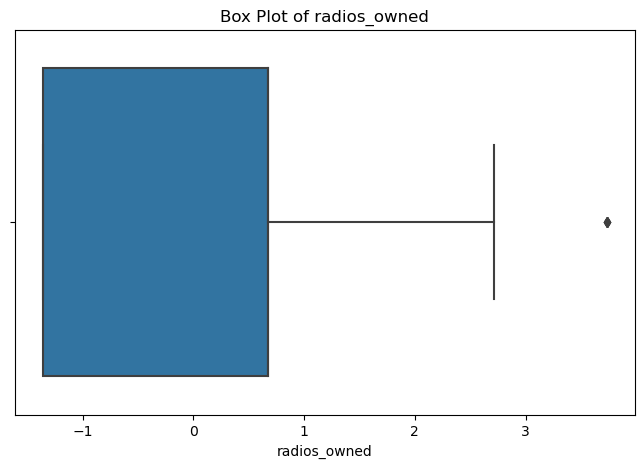

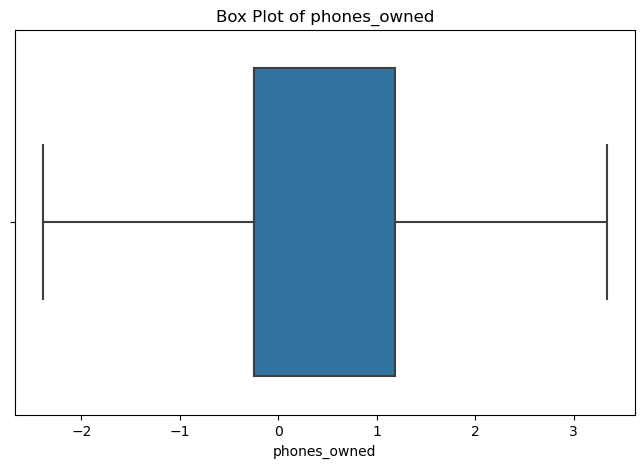

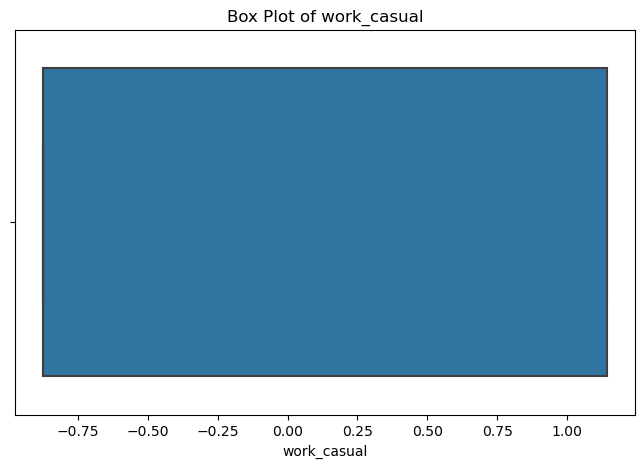

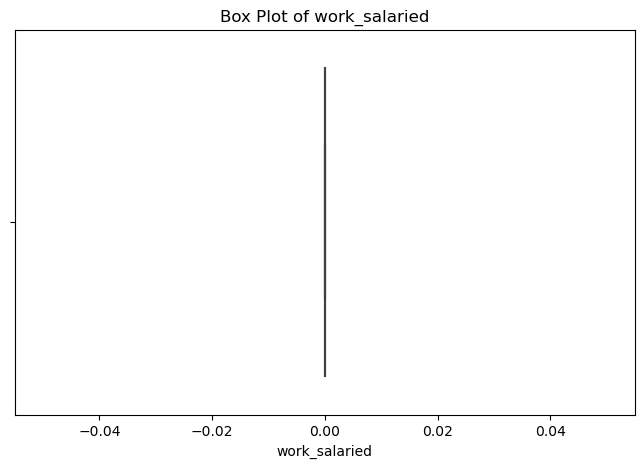

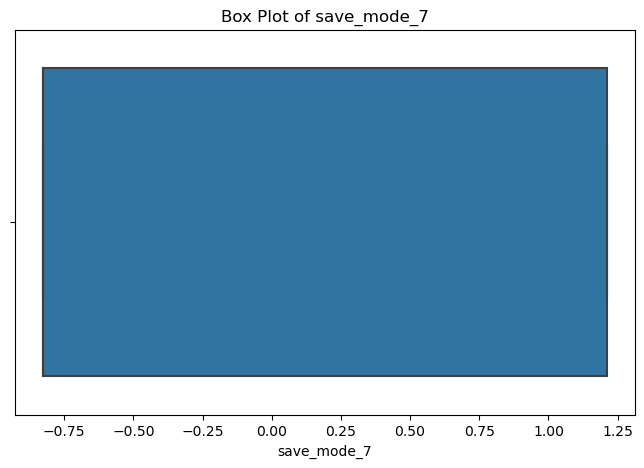

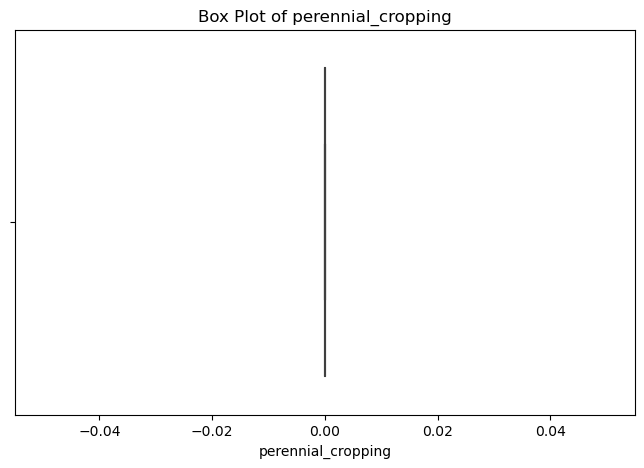

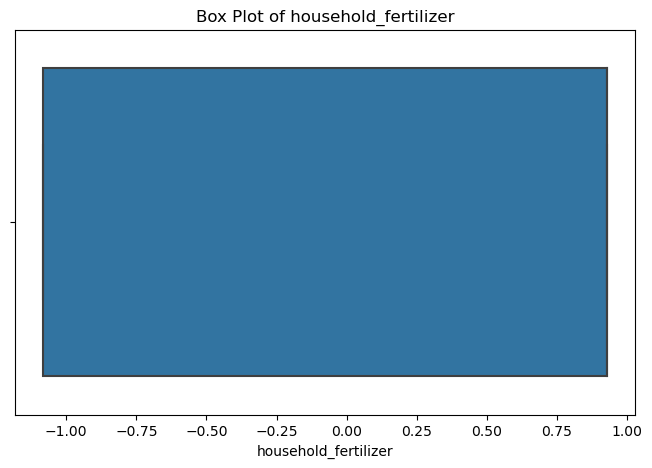

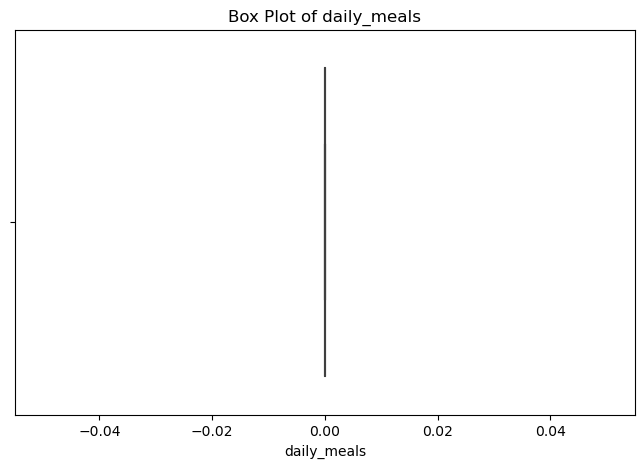

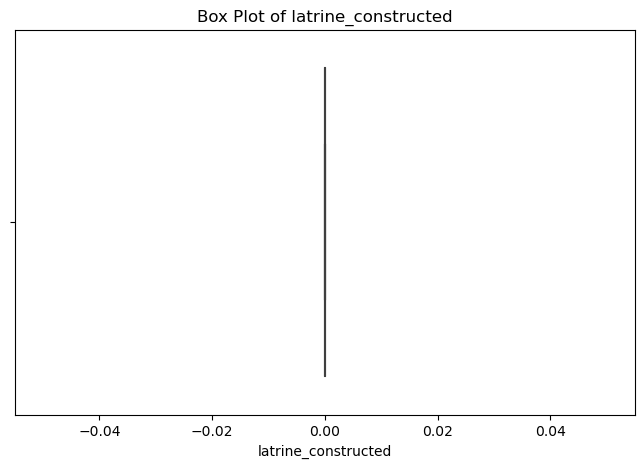

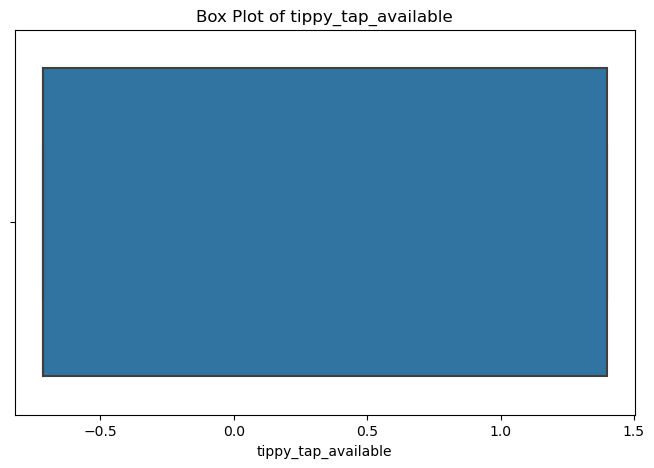

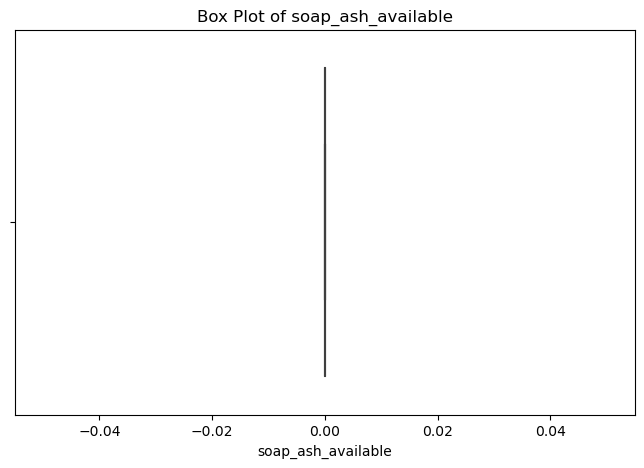

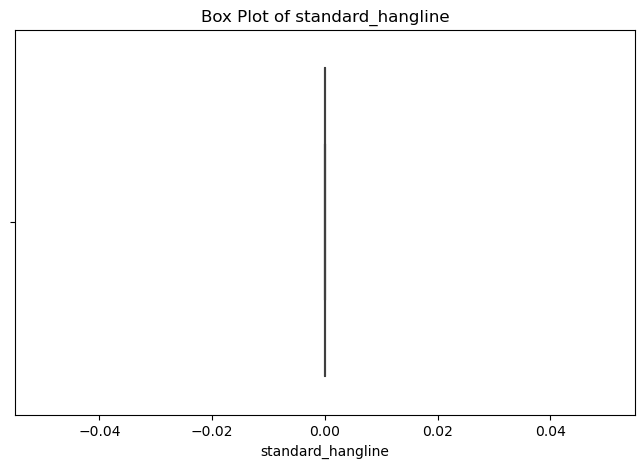

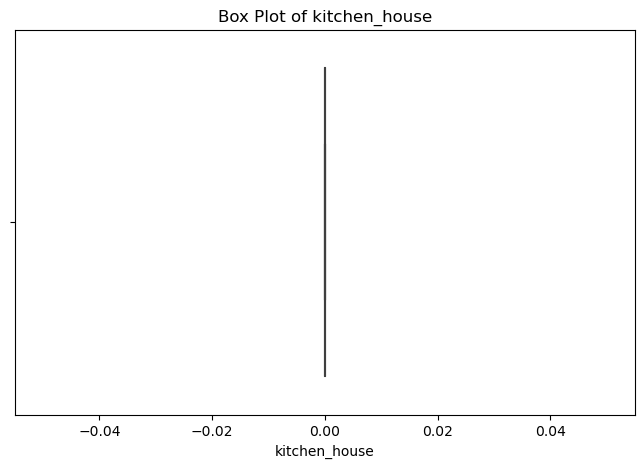

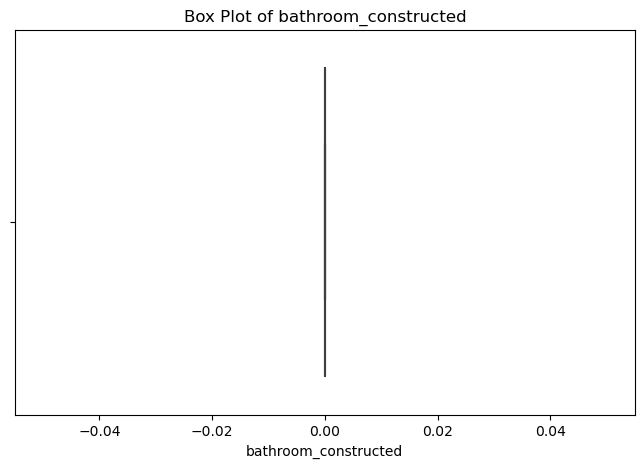

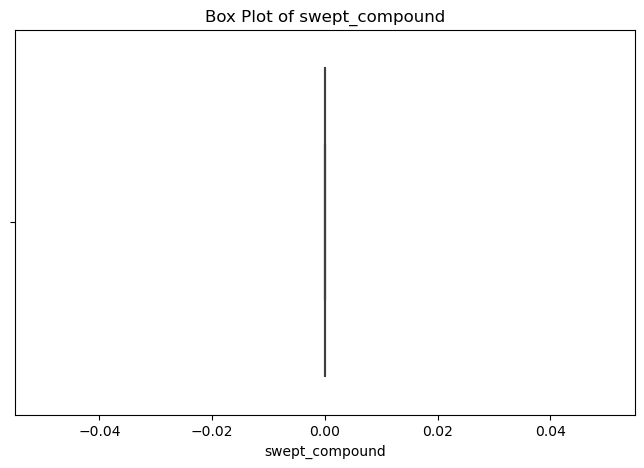

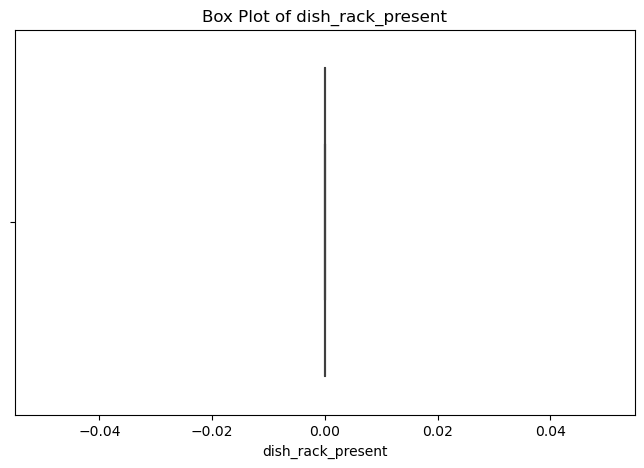

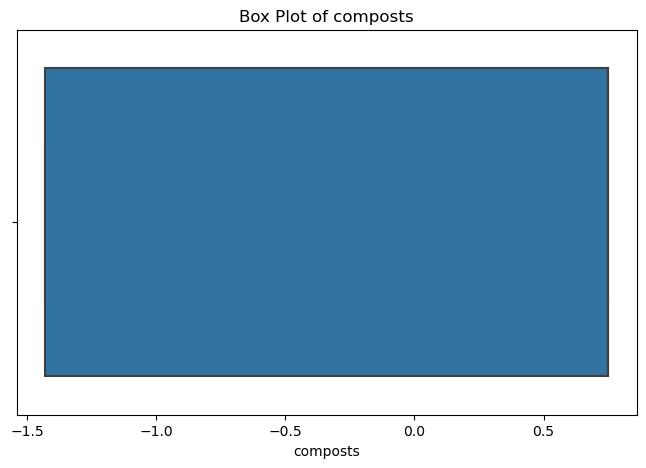

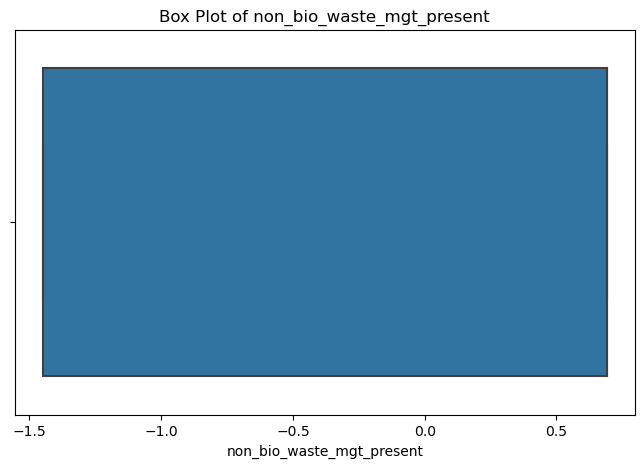

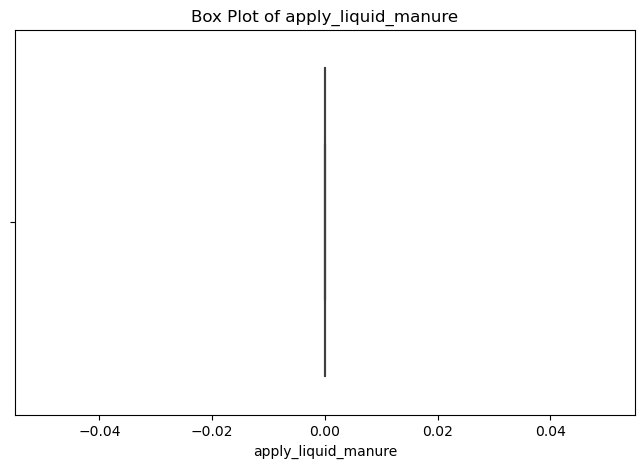

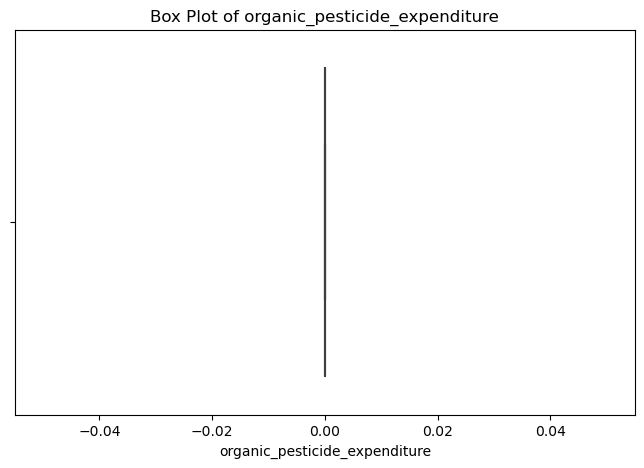

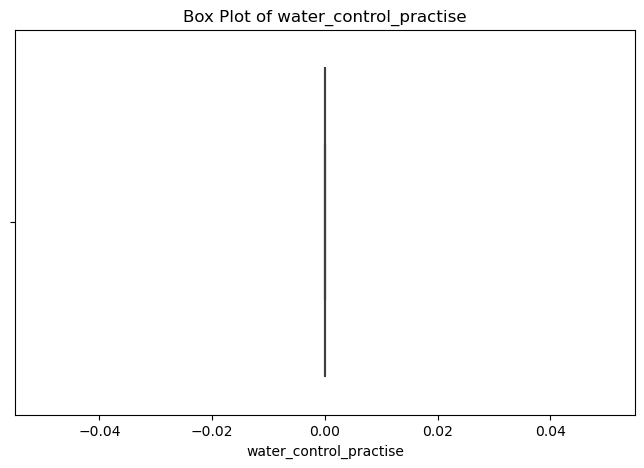

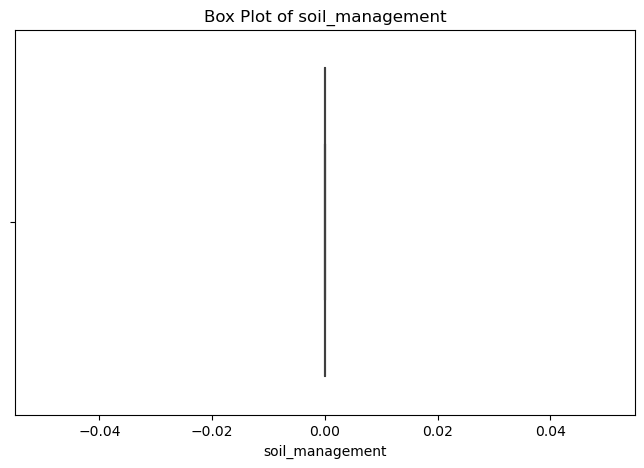

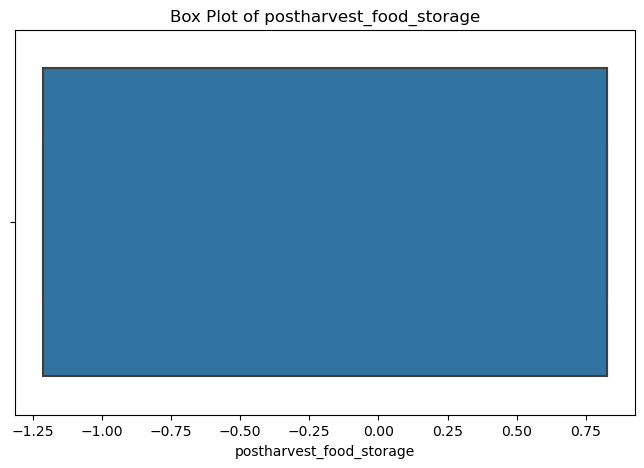

In [17]:
# Box plot for numerical features to identify potential outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=train_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

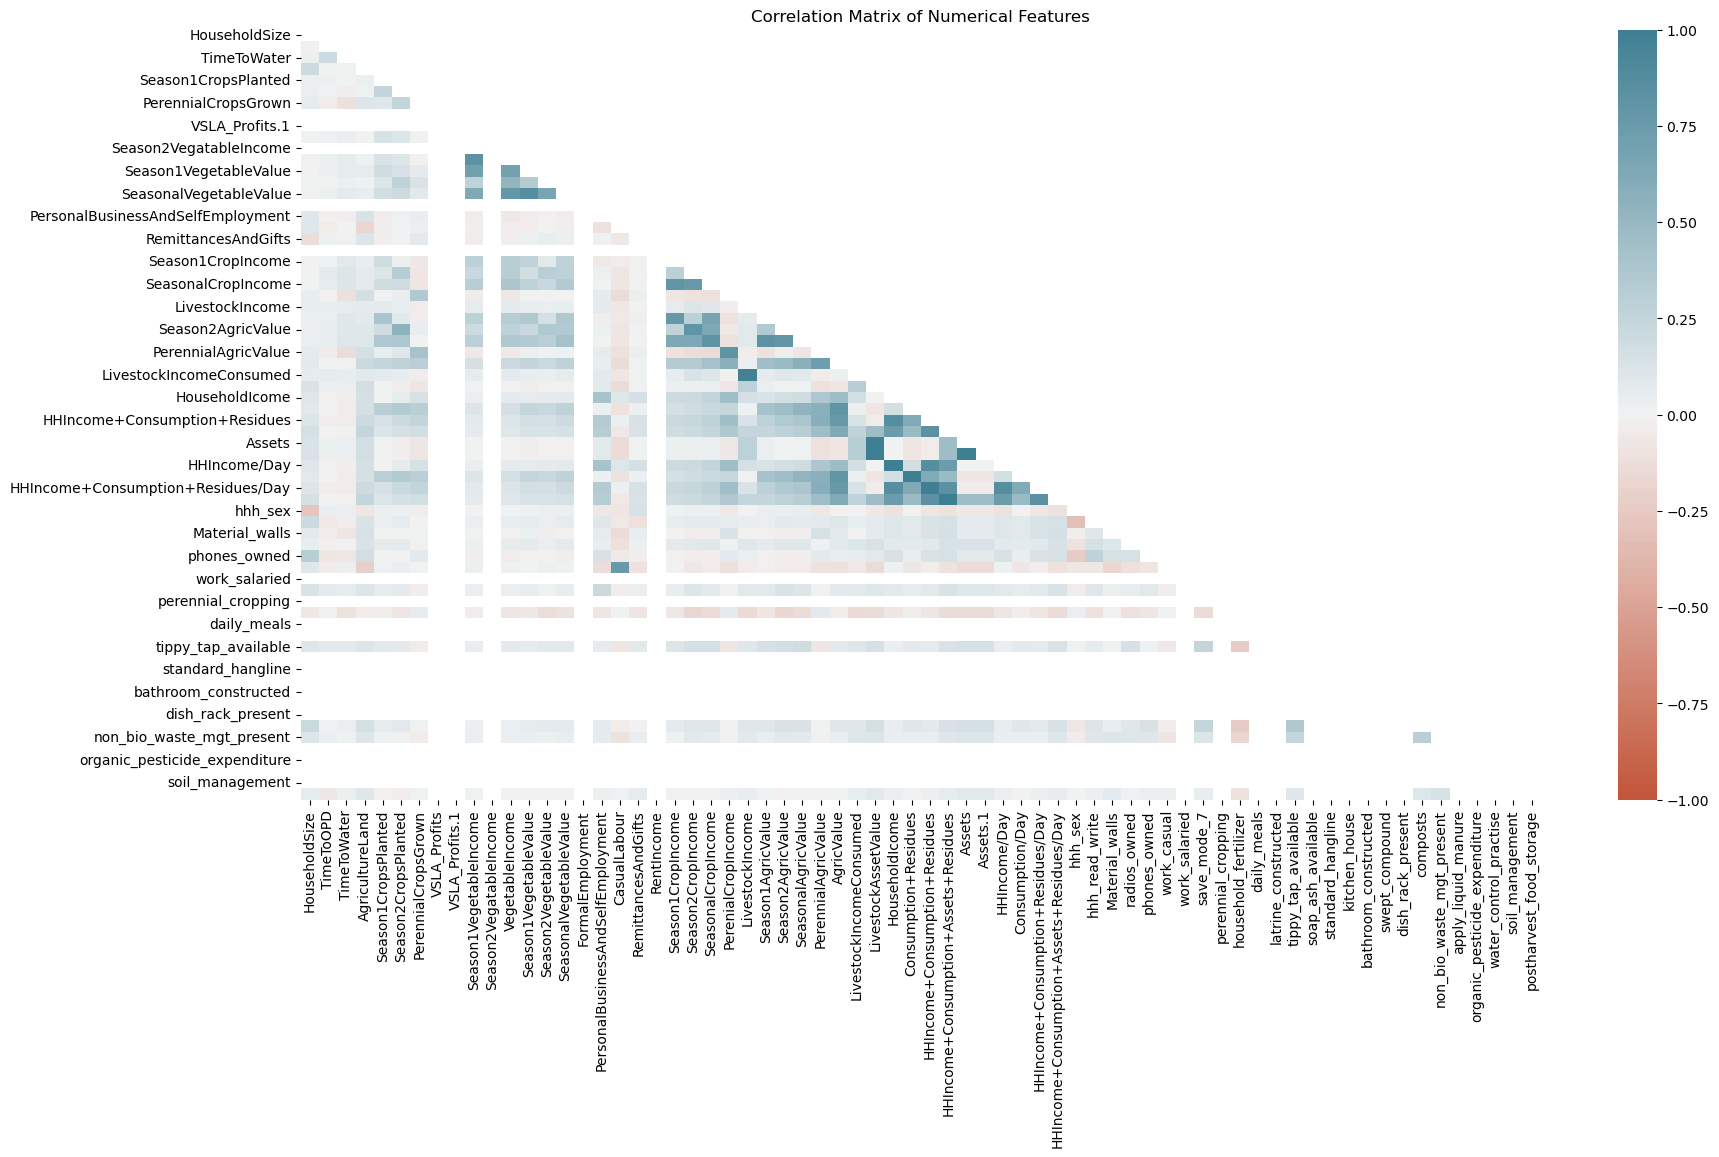

In [24]:
plt.figure(figsize=(20, 10))
correlation_matrix = train_data[numerical_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype=bool))
sns.heatmap(correlation_matrix,  cmap=sns.diverging_palette(20, 220, n=200), annot=False, mask=mask,vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [26]:
# Check for skewness in numerical features
skewness = train_data[numerical_cols].skew()
print("Skewness of Numerical Features:\n", skewness)

# Correlation with the target variable
correlation_with_target = train_data.corr()['HHIncome+Consumption+Residues/Day'].sort_values(ascending=False)
print("\nCorrelation with Target Variable 'HHIncome+Consumption+Residues/Day':\n", correlation_with_target)

# Step 7: Investigate Any Potential Issues or Patterns
# Checking for multicollinearity (if correlation coefficient > 0.8 or < -0.8)
high_corr_pairs = correlation_matrix[(correlation_matrix > 0.8) | (correlation_matrix < -0.8) & (correlation_matrix != 1.0)]
print("\nHighly Correlated Feature Pairs:\n", high_corr_pairs.dropna(how='all').dropna(axis=1, how='all'))

Skewness of Numerical Features:
 HouseholdSize                               0.285183
TimeToOPD                                   0.884499
TimeToWater                                 0.815200
AgricultureLand                             0.854593
Season1CropsPlanted                         0.392876
Season2CropsPlanted                         0.305769
PerennialCropsGrown                         0.619816
VSLA_Profits                                0.000000
VSLA_Profits.1                              0.000000
Season1VegetableIncome                      1.201459
Season2VegatableIncome                      0.000000
VegetableIncome                             1.257017
Season1VegetableValue                       1.226600
Season2VegetableValue                       1.263586
SeasonalVegetableValue                      1.179600
FormalEmployment                            0.000000
PersonalBusinessAndSelfEmployment           1.144531
CasualLabour                                1.244879
RemittancesAn

C:\Users\kaweesi.UG\AppData\Local\Temp\ipykernel_39264\3180646524.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = train_data.corr()['HHIncome+Consumption+Residues/Day'].sort_values(ascending=False)



Correlation with Target Variable 'HHIncome+Consumption+Residues/Day':
 HHIncome+Consumption+Residues/Day           1.000000
HHIncome+Consumption+Residues               1.000000
HHIncome/Day                                0.862193
HouseholdIcome                              0.862193
HHIncome+Consumption+Assets+Residues/Day    0.839316
HHIncome+Consumption+Assets+Residues        0.839316
AgricValue                                  0.762366
Consumption+Residues                        0.613343
Consumption/Day                             0.613343
PerennialAgricValue                         0.582021
PerenialCropIncome                          0.457295
SeasonalAgricValue                          0.386047
Season2AgricValue                           0.351752
PersonalBusinessAndSelfEmployment           0.332377
business_number_1                           0.296348
Season1AgricValue                           0.287952
SeasonalCropIncome                          0.285862
PerennialCropsGrown        

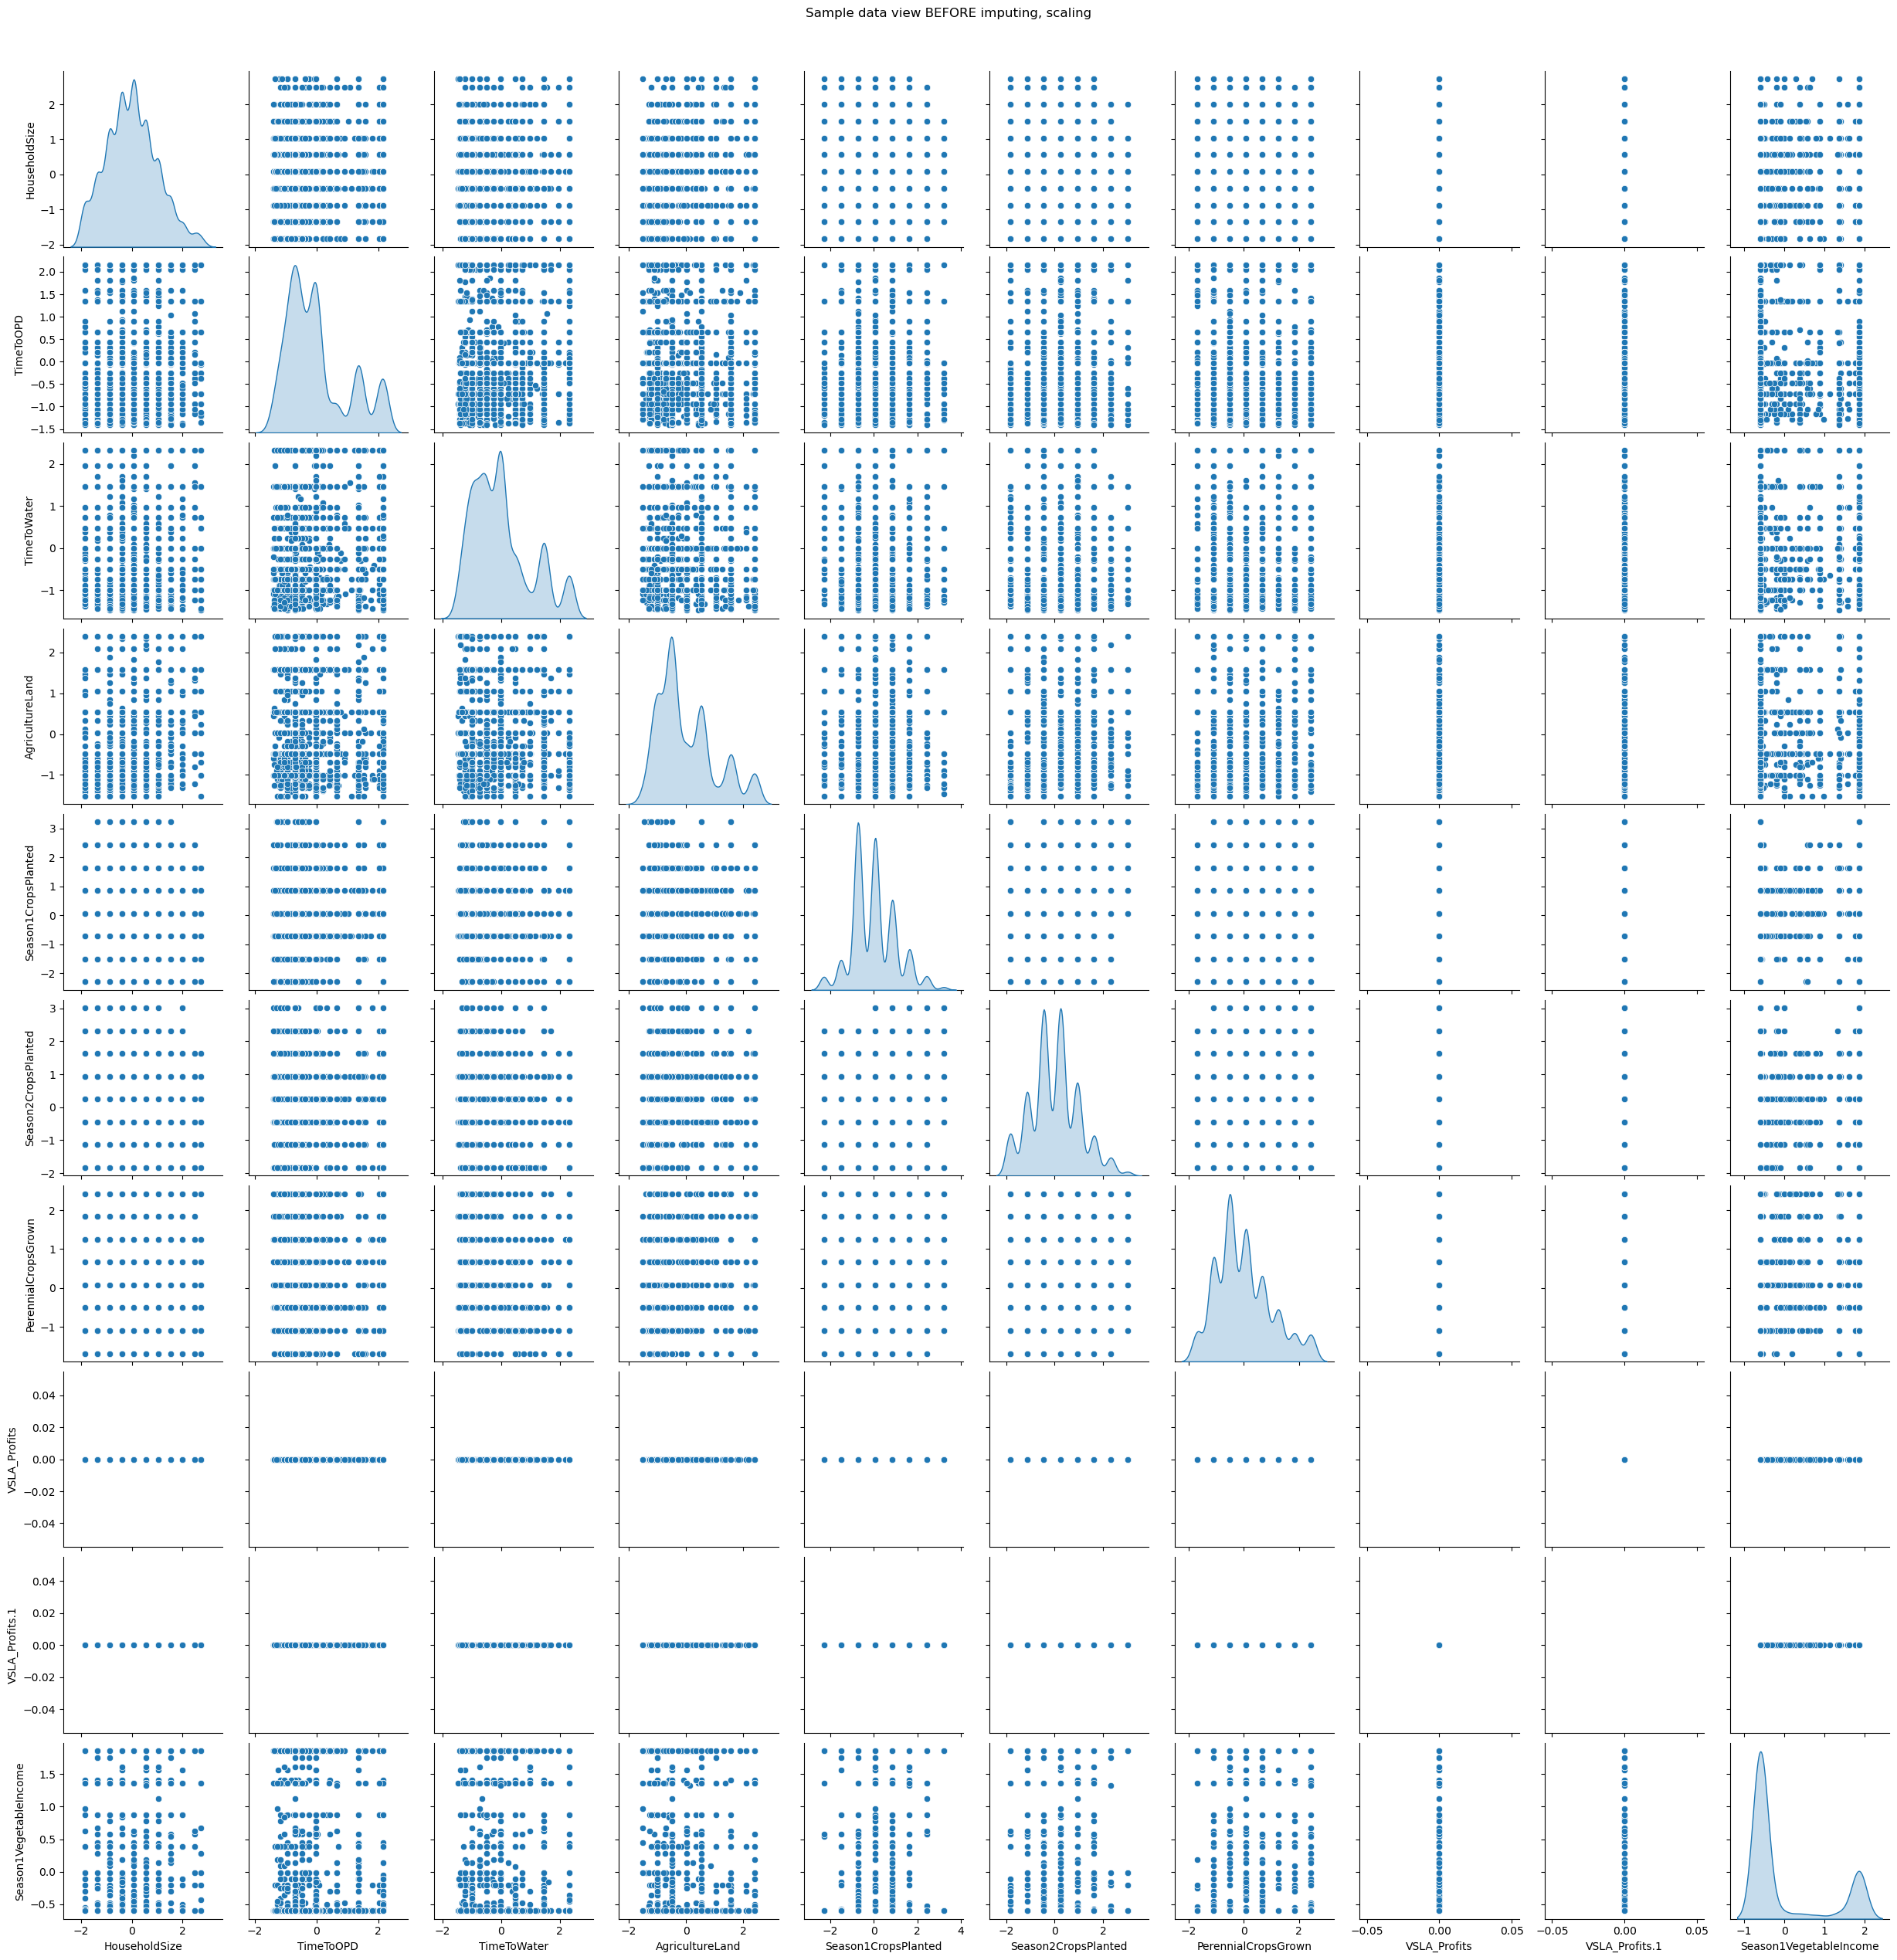

In [27]:
import matplotlib.pyplot as plt
pr1plt = sns.pairplot(data.iloc[:, :10], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

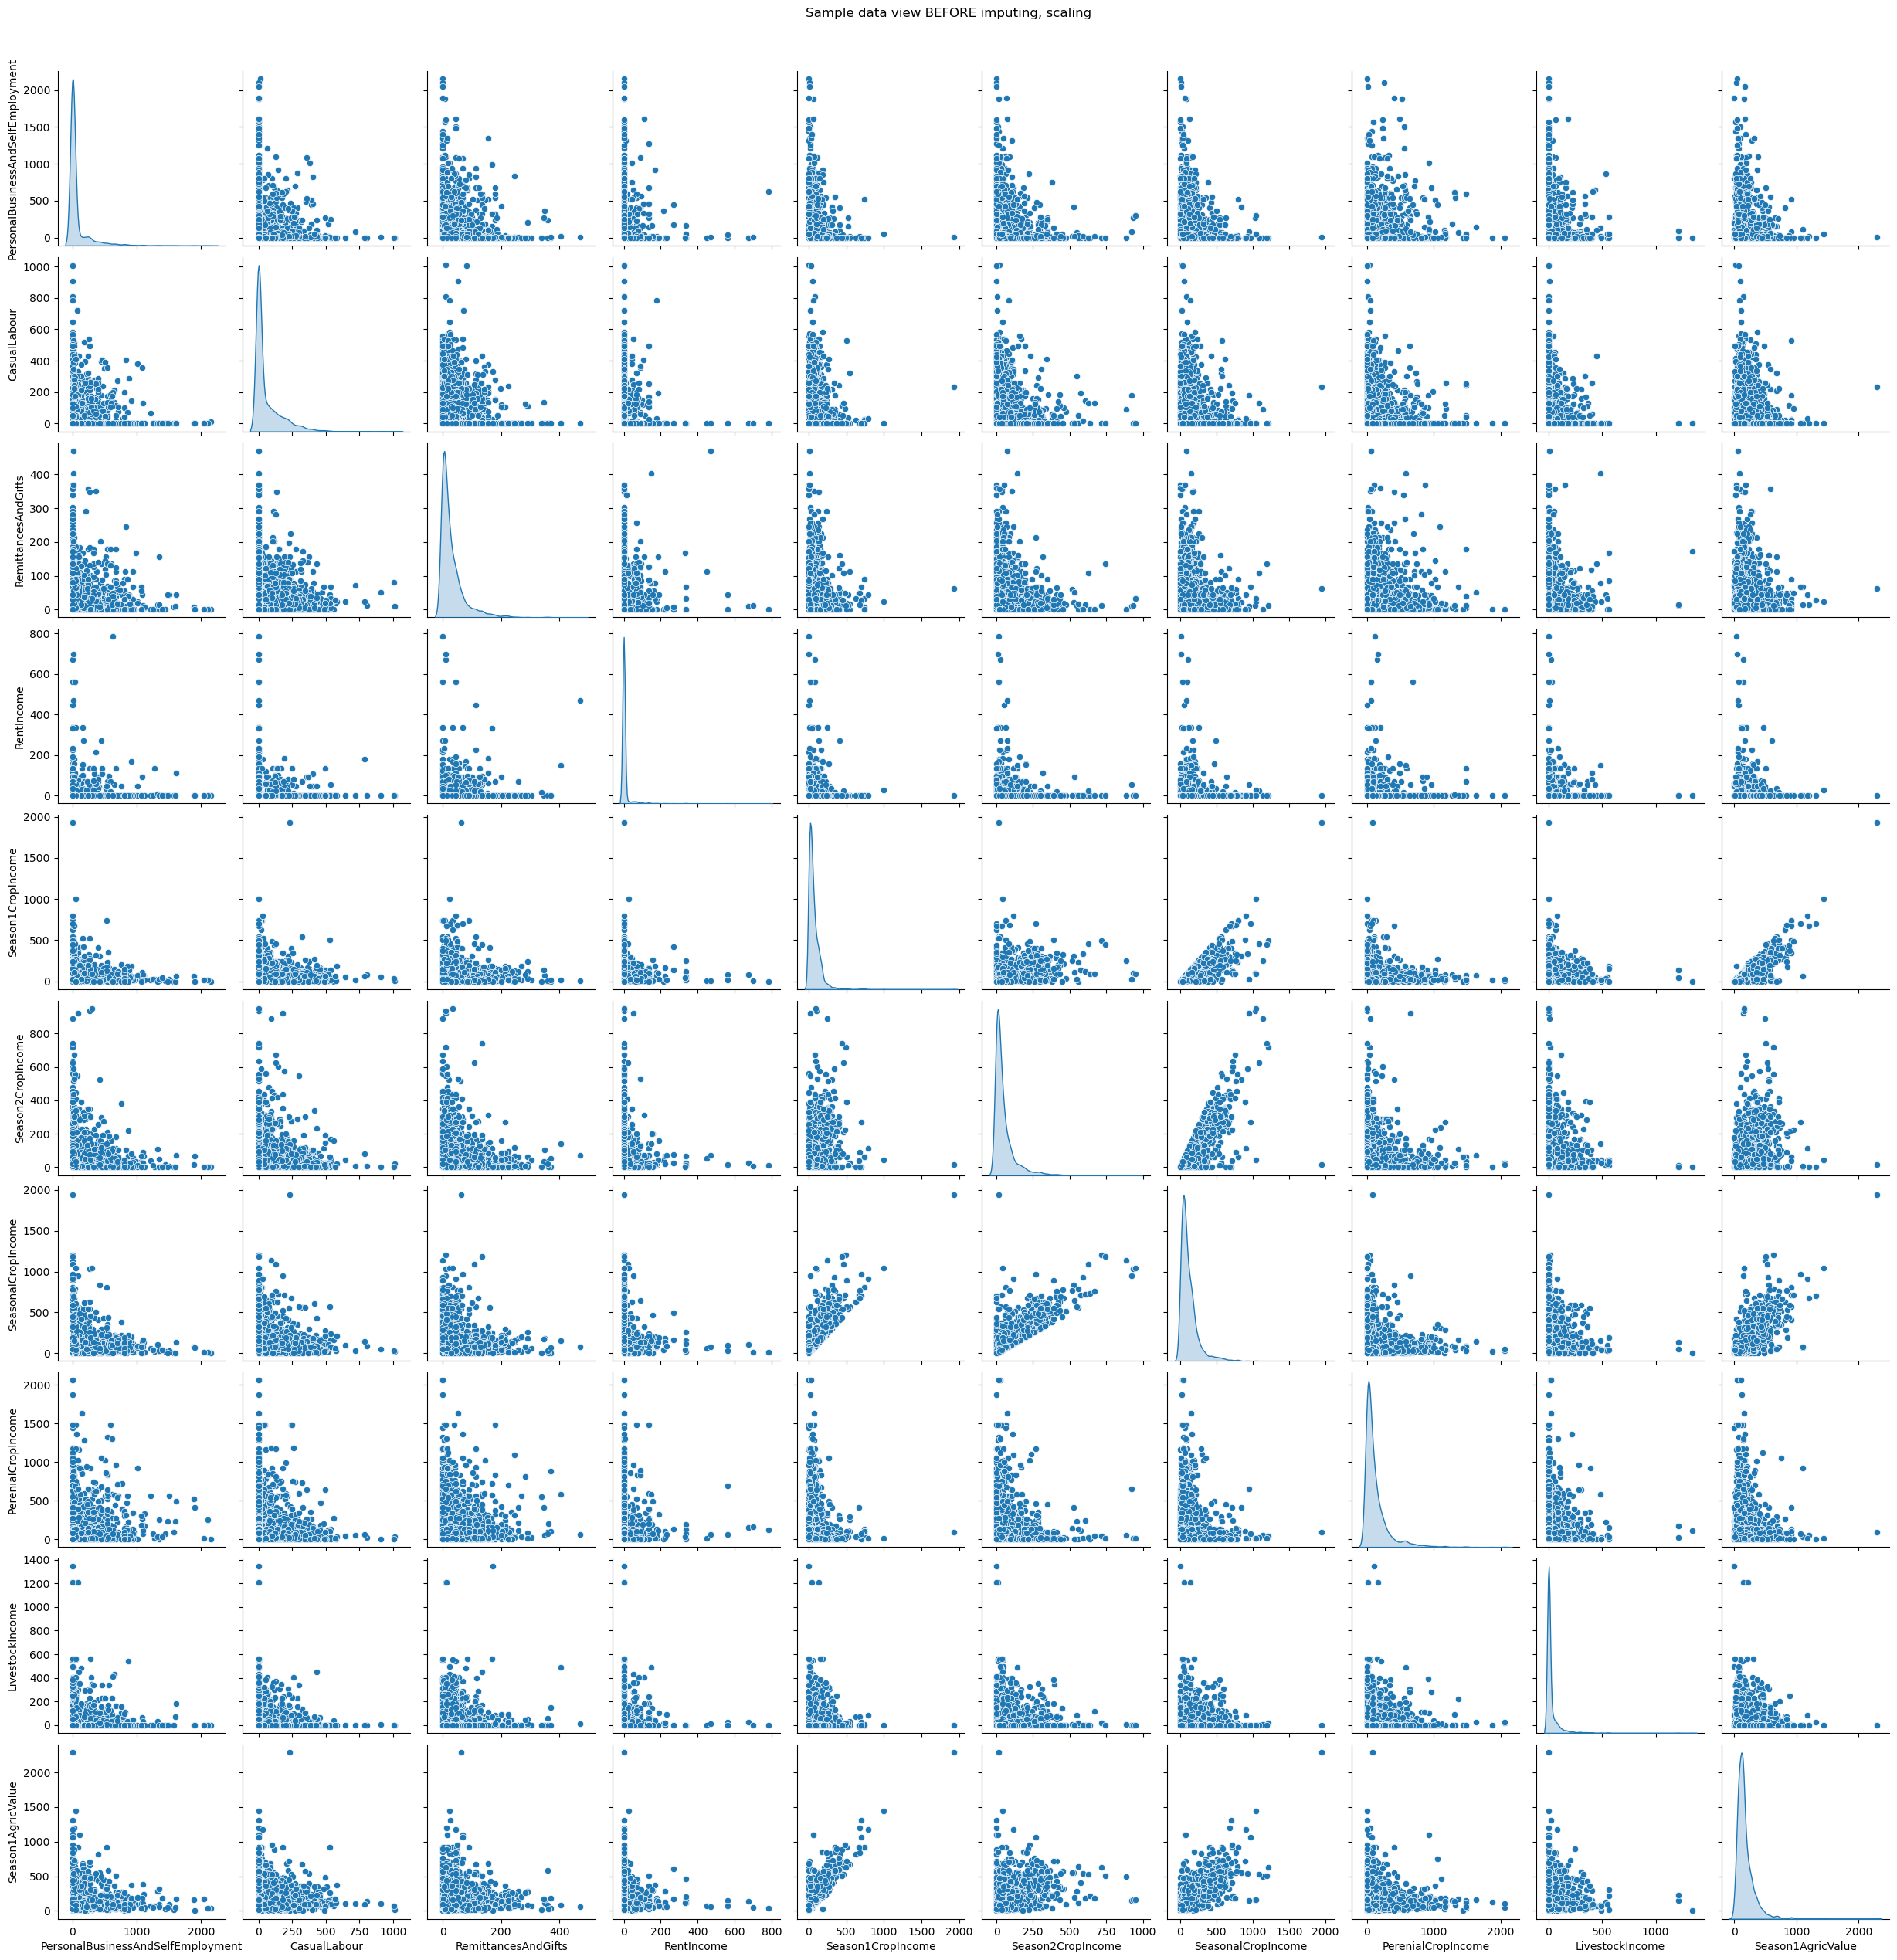

In [16]:
pr1plt = sns.pairplot(train_data.iloc[:, 20:30], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

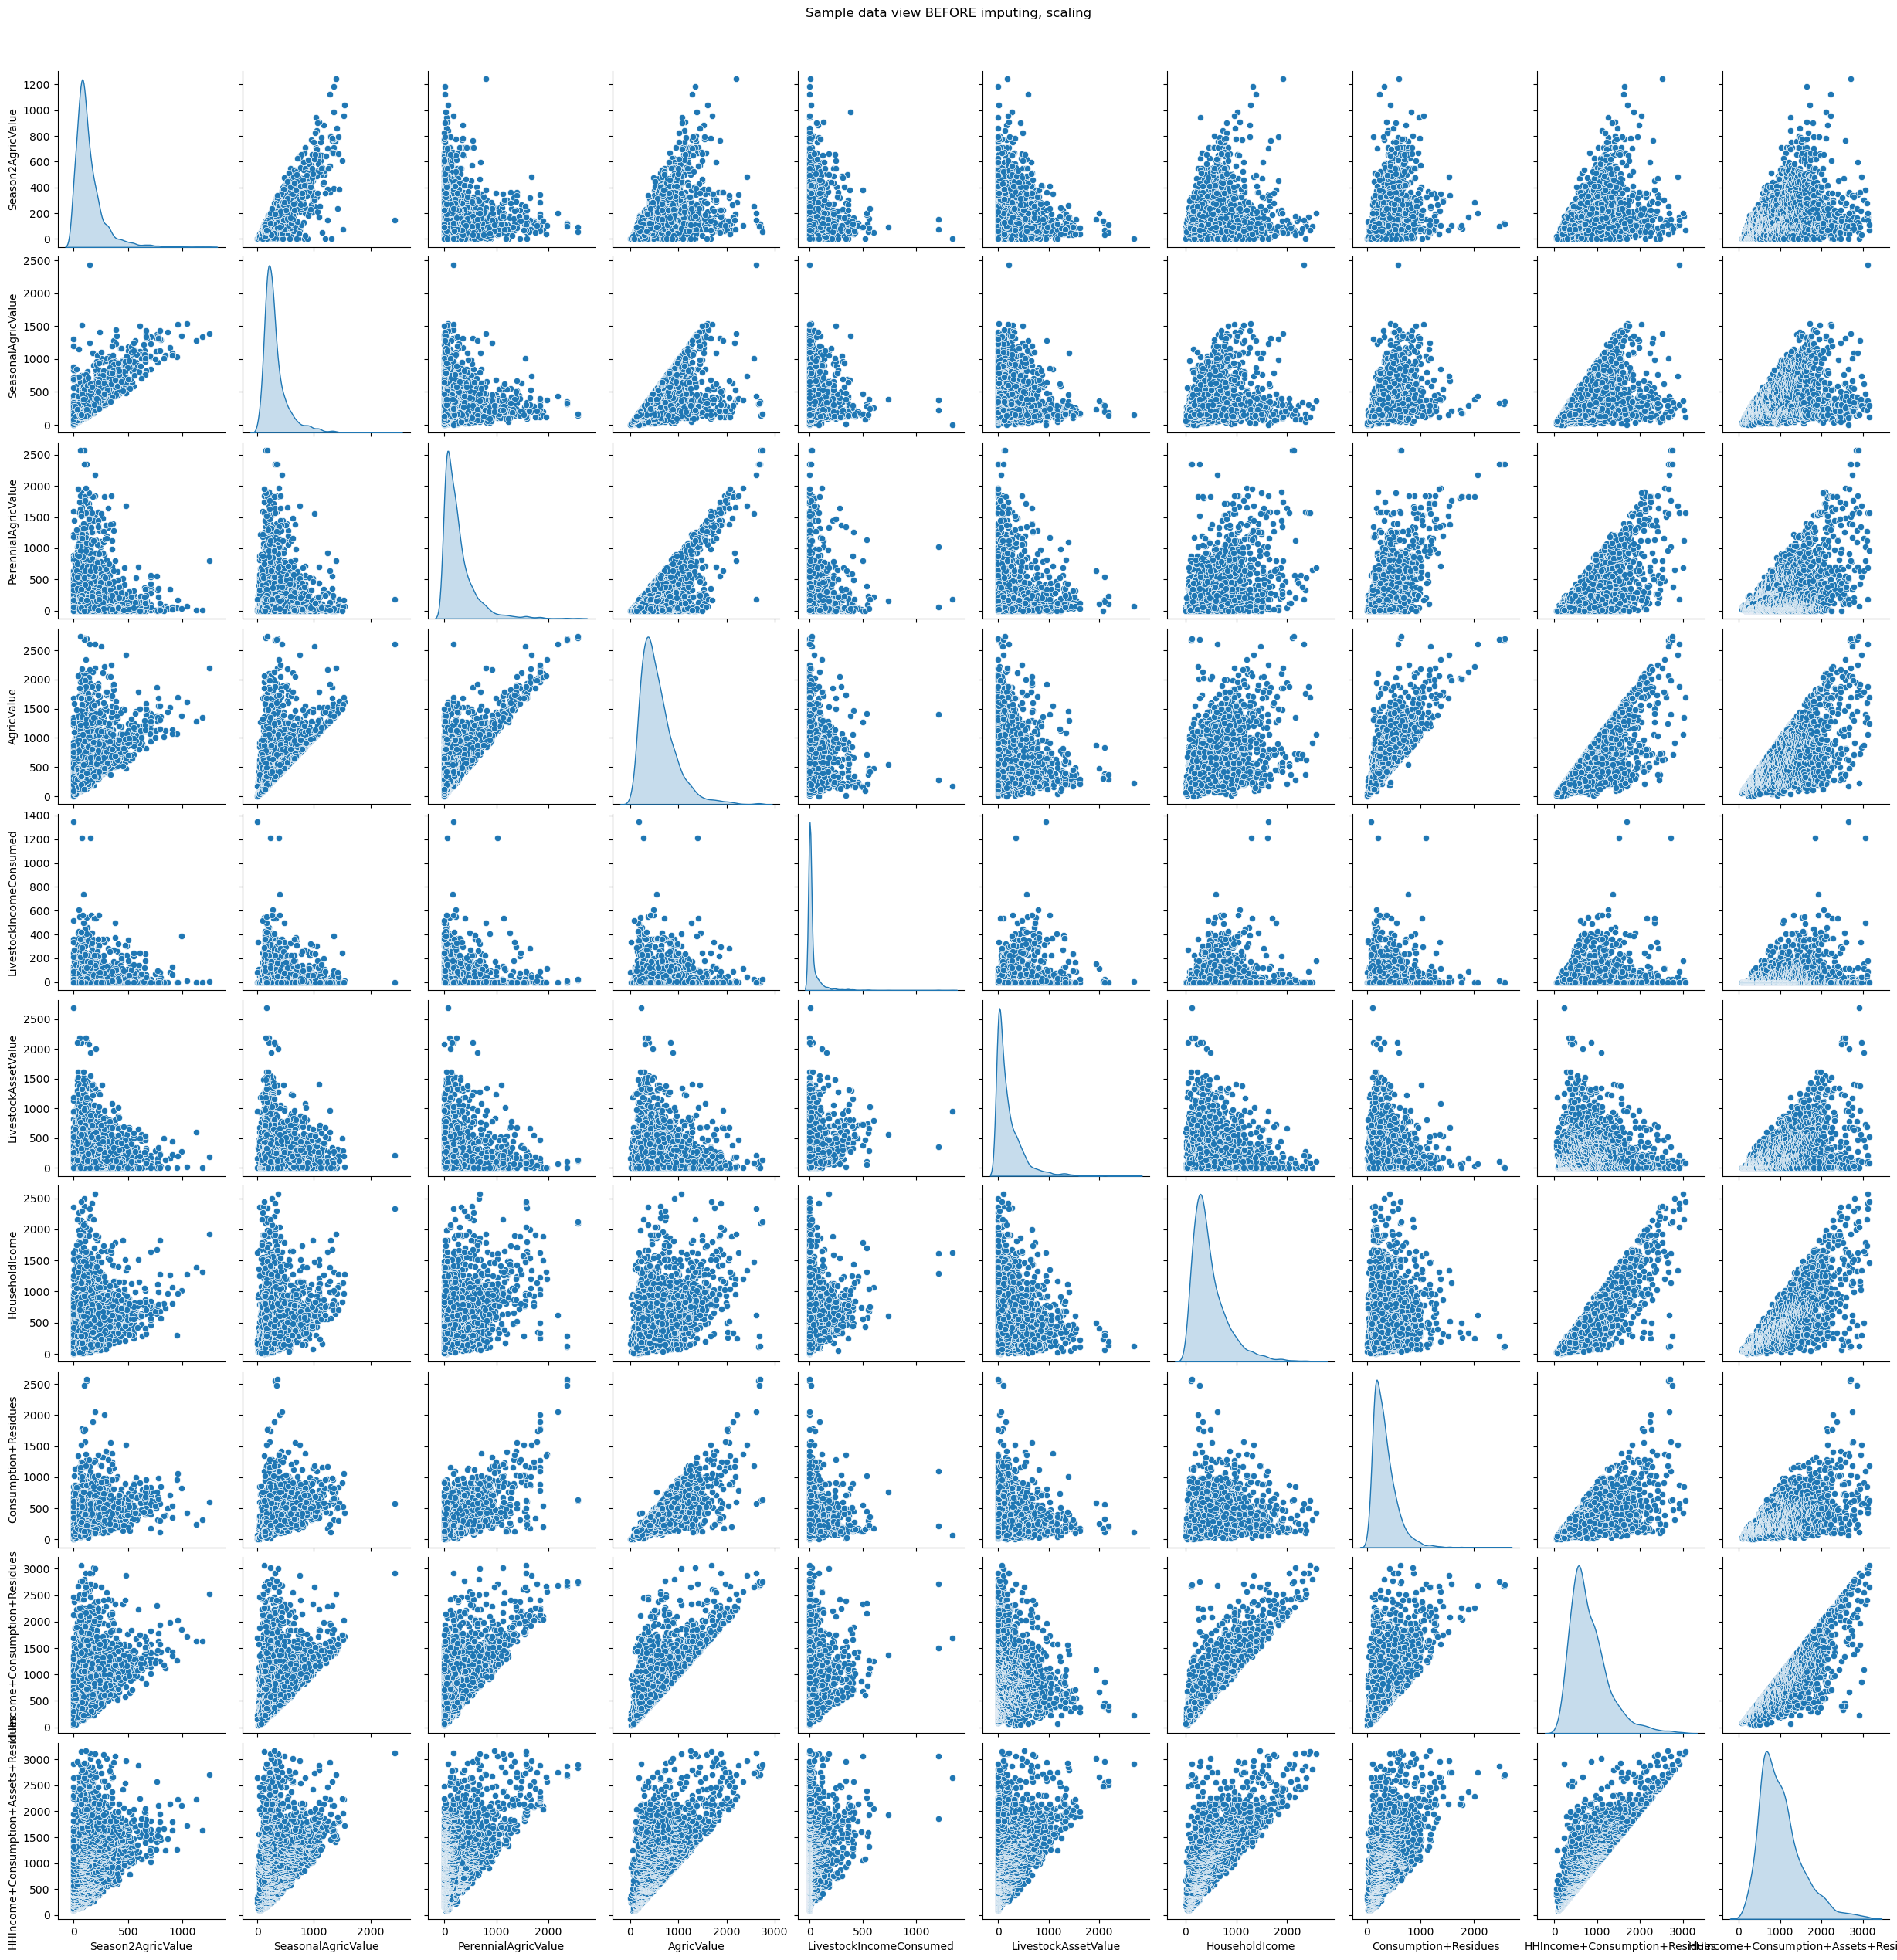

In [18]:
pr1plt = sns.pairplot(data.iloc[:, 30:40], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

## Model development

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin


# SOLID Principle: Single Responsibility Principle (SRP)
class DataPreprocessor:
    """Class for handling data preprocessing steps."""
    
    def __init__(self, df):
        self.df = df
        
    def scale_features(self, features):
        scaler = StandardScaler()
        self.df[features] = scaler.fit_transform(self.df[features])
        return self.df

    def split_data(self, target, test_size=0.2, val_size=0.1):
        X = self.df.drop(target, axis=1)
        y = self.df[target]
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size + val_size, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size / (test_size + val_size), random_state=42)
        return X_train, X_val, X_test, y_train, y_val, y_test

# SOLID Principle: Open/Closed Principle (OCP)
class BaseModel(BaseEstimator, ClassifierMixin):
    """Base class for models."""
    
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        self.model.fit(X, y)
        
    def predict(self, X):
        return self.model.predict(X)
    
    def cross_validate(self, X, y, cv=5):
        return cross_val_score(self.model, X, y, cv=cv)

features = X.columns 
target = 'ProgressStatus'

# Instantiate the preprocessor
preprocessor = DataPreprocessor(train_data)
df = preprocessor.scale_features(features)

# Split data into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = preprocessor.split_data(target)

# Step 4: Implement the Models (Baseline and Random Forest)

# Baseline Model: Logistic Regression
logistic_model = BaseModel(LogisticRegression(max_iter=200))
logistic_model.fit(X_train, y_train)

# Cross-validate the logistic regression model
logistic_cv_scores = logistic_model.cross_validate(X_train, y_train)
print(f"Logistic Regression Cross-Validation Accuracy: {np.mean(logistic_cv_scores):.2f}")

# Predict on the validation set
y_val_pred = logistic_model.predict(X_val)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_val_pred))

# Advanced Model: Random Forest Classifier
rf_model = BaseModel(RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Cross-validate the random forest model
rf_cv_scores = rf_model.cross_validate(X_train, y_train)
print(f"Random Forest Cross-Validation Accuracy: {np.mean(rf_cv_scores):.2f}")

# Predict on the validation set
y_val_pred_rf = rf_model.predict(X_val)
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_val, y_val_pred_rf))

# Step 5: Evaluate the Models on the Test Set
# Logistic Regression
y_test_pred = logistic_model.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Logistic Regression Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Random Forest Classifier
y_test_pred_rf = rf_model.predict(X_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("Random Forest Test Classification Report:\n", classification_report(y_test, y_test_pred_rf))


Logistic Regression Cross-Validation Accuracy: 0.89
Logistic Regression Validation Accuracy: 0.8987179487179487
Logistic Regression Classification Report:
                      precision    recall  f1-score   support

            At Risk       0.75      0.70      0.72       110
           On Track       0.97      0.95      0.96       351
Severely Struggling       0.95      0.91      0.93       152
         Struggling       0.82      0.90      0.85       167

           accuracy                           0.90       780
          macro avg       0.87      0.87      0.87       780
       weighted avg       0.90      0.90      0.90       780

Random Forest Cross-Validation Accuracy: 1.00
Random Forest Validation Accuracy: 1.0
Random Forest Classification Report:
                      precision    recall  f1-score   support

            At Risk       1.00      1.00      1.00       110
           On Track       1.00      1.00      1.00       351
Severely Struggling       1.00      1.00      